In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
import requests
import yfinance as yf
import datetime as dt

In [2]:
div_aristocrats_wiki_url = "https://en.wikipedia.org/wiki/S%26P_500_Dividend_Aristocrats"
div_aristocrats_wiki_df_list = pd.read_html(div_aristocrats_wiki_url)

div_aristocrats_df = div_aristocrats_wiki_df_list[0]
div_aristocrats_df

,Company,Ticker symbol,Sector
0,3M,MMM,Industrials
1,A.O. Smith,AOS,Industrials
2,Abbott Laboratories,ABT,Health Care
3,AbbVie,ABBV,Health Care
4,AFLAC,AFL,Financials
...,...,...,...
61,Target Corp,TGT,Consumer Discretionary
62,W. W. Grainger,GWW,Industrials
63,Walgreens Boots Alliance,WBA,Consumer Staples
64,Walmart Inc.,WMT,Consumer Staples


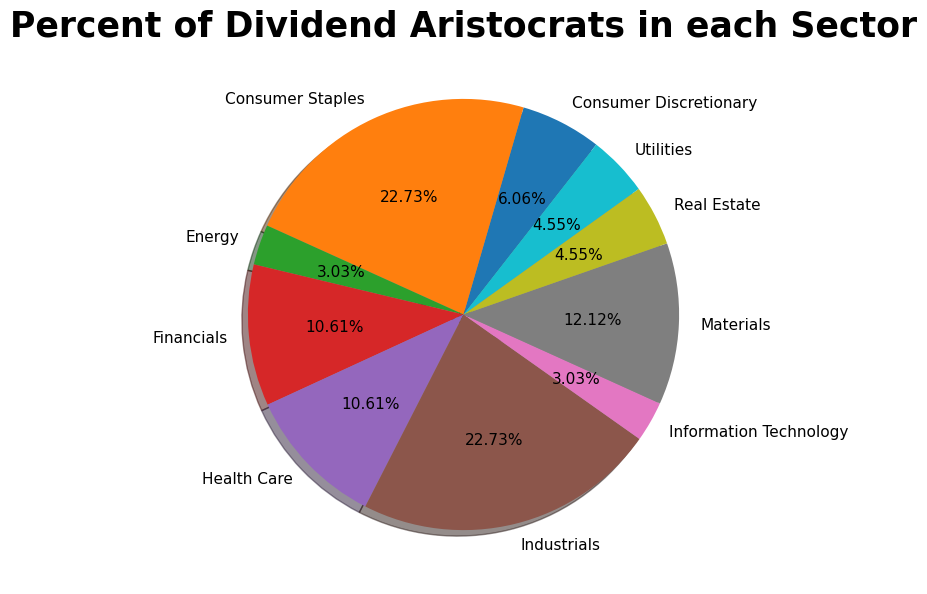

In [3]:
sectors = div_aristocrats_df.groupby("Sector")["Sector"].count()
data = sectors.values
labels = sectors.index
  
#e = [0.03, 0]  # e works like this: If e is not *None*, it is a len(x) array which specifies the fraction 
                        #of the radius with which to offset, or separate from each wedge.

plt.figure(figsize=(8,7))  
plt.pie(data, labels=labels, autopct = '%.2f%%', shadow = True, startangle = 52,  textprops={'fontsize': 11, 'color': 'black'})
plt.title("Percent of Dividend Aristocrats in each Sector", fontsize = 25, color = 'black', fontweight = "bold");



In [4]:
div_aristocrats_df["Company"].unique()

array(['3M', 'A.O. Smith', 'Abbott Laboratories', 'AbbVie', 'AFLAC',
       'Air Products & Chemicals', 'Albemarle Corporation', 'Amcor',
       'Archer-Daniels-Midland Co', 'Atmos Energy Corp',
       'Automatic Data Processing', 'Becton Dickinson & Co',
       'Brown & Brown Inc.', 'Brown–Forman (class B)',
       'Cardinal Health Inc', 'Caterpillar Inc', 'C.H. Robinson',
       'Chevron Corp', 'Chubb Limited', 'Church & Dwight Co. Inc.',
       'Cincinnati Financial Corp', 'Cintas Corp', 'Clorox',
       'Coca-Cola Co', 'Colgate-Palmolive', 'Consolidated Edison Inc',
       'Dover Corp', 'Ecolab Inc', 'Emerson Electric',
       'Essex Property Trust', 'Expeditors International of Washington',
       'Exxon Mobil Corp', 'Federal Realty Investment Trust',
       'Franklin Resources Inc', 'General Dynamics',
       'Genuine Parts Company', 'Hormel Foods Corp',
       'Illinois Tool Works', 'IBM', 'The J. M. Smucker Company',
       'Johnson & Johnson', 'Kimberly-Clark', 'Linde plc', "L

In [5]:
div_ticks = list(div_aristocrats_df["Ticker symbol"].unique())
print(f"There are {len(div_ticks)} Dividend Aristocrats")  #answer should be 66 as of 7/8/23
div_ticks = [word.replace("BF.B", "BF-B") for word in div_ticks]
div_ticks.remove("AMCR")

There are 66 Dividend Aristocrats


In [6]:
print(f"There are {len(div_ticks)} Dividend Aristocrats")  #answer should be 65 after removing AMCR

There are 65 Dividend Aristocrats


In [7]:
div_ticks[:5]

['MMM', 'AOS', 'ABT', 'ABBV', 'AFL']

In [8]:
total_portfolio_string = ' '.join(div_ticks)
total_portfolio_string

'MMM AOS ABT ABBV AFL APD ALB ADM ATO ADP BDX BRO BF-B CAH CAT CHRW CVX CB CHD CINF CTAS CLX KO CL ED DOV ECL EMR ESS EXPD XOM FRT BEN GD GPC HRL ITW IBM SJM JNJ KMB LIN LOW MKC MCD MDT NEE NDSN NUE PNR PEP PPG PG O ROP SPGI SHW SWK SYY TROW TGT GWW WBA WMT WST'

In [9]:
API_KEY = "L1UOTK5RA0DV5XHN"

In [10]:
dict_portfolio = {}

In [11]:
start_date = '2010-07-08'
end_date = '2023-07-08'
ticker = total_portfolio_string
df = yf.download(ticker, start_date, end_date)

[*********************100%***********************]  65 of 65 completed


In [12]:
df.head()

Adj Close                                                         \
                ABBV        ABT        ADM        ADP        AFL        ALB   
Date                                                                          
2010-07-08       NaN  17.265083  18.993568  26.033998  17.004082  34.520870   
2010-07-09       NaN  17.239960  19.000685  26.259703  17.324774  34.579155   
2010-07-12       NaN  17.164581  18.972231  26.427374  17.263521  33.921387   
2010-07-13       NaN  17.269646  19.185568  26.756271  17.613049  35.178654   
2010-07-14       NaN  17.334848  19.128675  26.891691  17.443682  34.795635   

                                                       ...  Volume           \
                 AOS        APD        ATO        BDX  ...     SJM     SPGI   
Date                                                   ...                    
2010-07-08  7.042826  46.035328  19.444447  54.941067  ...  952700  3384600   
2010-07-09  7.159292  46.677876  19.430752  54.548416  ...  698000  1487300   
2010-07-12  7.096264  46.296375  19.471819  54.249989  ...  423300  1723000   
2010-07-13  7.407302  47.474354  19.752432  54.595539  ...  586400  2054200   
2010-07-14  7.322347  47.025917  19.656607  54.650513  ...  495900  1413300   

                                                                            \
                SWK      SYY      TGT     TROW       WBA       WMT     WST   
Date                                                                         
2010-07-08  2091000  2711900  9063700  3733000  11703400  12650000  443600   
2010-07-09   845100  2480700  5319100  2596100  10043300  11607200  320200   
2010-07-12  1319500  2511100  5637700  2513500  11137200  13440900  573000   
2010-07-13  1638000  2992500  6053400  1945800  14322000  13219800  437200   
2010-07-14  1056700  2599700  5210800  1174900  15894600  10708300  297600   

                      
                 XOM  
Date                  
2010-07-08  40430300  
2010-07-09  25976500  
2010-07-12  23515000  
2010-07-13  30514200  
2010-07-14  26061100  

[5 rows x 390 columns]

In [13]:
df["Date"] = df.index
df.reset_index(drop=True, inplace=True)

C:\Users\Irochka\AppData\Local\Temp\ipykernel_78416\2561683645.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Date"] = df.index


In [14]:
df.head()

Adj Close                                                                   \
       ABBV        ABT        ADM        ADP        AFL        ALB       AOS   
0       NaN  17.265083  18.993568  26.033998  17.004082  34.520870  7.042826   
1       NaN  17.239960  19.000685  26.259703  17.324774  34.579155  7.159292   
2       NaN  17.164581  18.972231  26.427374  17.263521  33.921387  7.096264   
3       NaN  17.269646  19.185568  26.756271  17.613049  35.178654  7.407302   
4       NaN  17.334848  19.128675  26.891691  17.443682  34.795635  7.322347   

                                    ...   Volume                             \
         APD        ATO        BDX  ...     SPGI      SWK      SYY      TGT   
0  46.035328  19.444447  54.941067  ...  3384600  2091000  2711900  9063700   
1  46.677876  19.430752  54.548416  ...  1487300   845100  2480700  5319100   
2  46.296375  19.471819  54.249989  ...  1723000  1319500  2511100  5637700   
3  47.474354  19.752432  54.595539  ...  2054200  1638000  2992500  6053400   
4  47.025917  19.656607  54.650513  ...  1413300  1056700  2599700  5210800   

                                                       Date  
      TROW       WBA       WMT     WST       XOM             
0  3733000  11703400  12650000  443600  40430300 2010-07-08  
1  2596100  10043300  11607200  320200  25976500 2010-07-09  
2  2513500  11137200  13440900  573000  23515000 2010-07-12  
3  1945800  14322000  13219800  437200  30514200 2010-07-13  
4  1174900  15894600  10708300  297600  26061100 2010-07-14  

[5 rows x 391 columns]

In [15]:
list(df.columns)

[('Adj Close', 'ABBV'),
 ('Adj Close', 'ABT'),
 ('Adj Close', 'ADM'),
 ('Adj Close', 'ADP'),
 ('Adj Close', 'AFL'),
 ('Adj Close', 'ALB'),
 ('Adj Close', 'AOS'),
 ('Adj Close', 'APD'),
 ('Adj Close', 'ATO'),
 ('Adj Close', 'BDX'),
 ('Adj Close', 'BEN'),
 ('Adj Close', 'BF-B'),
 ('Adj Close', 'BRO'),
 ('Adj Close', 'CAH'),
 ('Adj Close', 'CAT'),
 ('Adj Close', 'CB'),
 ('Adj Close', 'CHD'),
 ('Adj Close', 'CHRW'),
 ('Adj Close', 'CINF'),
 ('Adj Close', 'CL'),
 ('Adj Close', 'CLX'),
 ('Adj Close', 'CTAS'),
 ('Adj Close', 'CVX'),
 ('Adj Close', 'DOV'),
 ('Adj Close', 'ECL'),
 ('Adj Close', 'ED'),
 ('Adj Close', 'EMR'),
 ('Adj Close', 'ESS'),
 ('Adj Close', 'EXPD'),
 ('Adj Close', 'FRT'),
 ('Adj Close', 'GD'),
 ('Adj Close', 'GPC'),
 ('Adj Close', 'GWW'),
 ('Adj Close', 'HRL'),
 ('Adj Close', 'IBM'),
 ('Adj Close', 'ITW'),
 ('Adj Close', 'JNJ'),
 ('Adj Close', 'KMB'),
 ('Adj Close', 'KO'),
 ('Adj Close', 'LIN'),
 ('Adj Close', 'LOW'),
 ('Adj Close', 'MCD'),
 ('Adj Close', 'MDT'),
 ('Adj Clo

In [16]:
df = df[["Date","Adj Close"]]

In [17]:
df = df.round(2)
df

Date Adj Close                                               \
                     ABBV     ABT    ADM     ADP    AFL     ALB    AOS   
0    2010-07-08       NaN   17.27  18.99   26.03  17.00   34.52   7.04   
1    2010-07-09       NaN   17.24  19.00   26.26  17.32   34.58   7.16   
2    2010-07-12       NaN   17.16  18.97   26.43  17.26   33.92   7.10   
3    2010-07-13       NaN   17.27  19.19   26.76  17.61   35.18   7.41   
4    2010-07-14       NaN   17.33  19.13   26.89  17.44   34.80   7.32   
...         ...       ...     ...    ...     ...    ...     ...    ...   
3267 2023-06-30    133.25  108.50  75.16  219.79  69.41  223.09  72.48   
3268 2023-07-03    133.53  106.71  76.32  218.73  69.79  229.26  72.08   
3269 2023-07-05    136.11  106.86  77.01  219.70  69.52  229.02  70.76   
3270 2023-07-06    135.75  106.69  76.63  221.65  69.25  227.57  70.31   
3271 2023-07-07    134.01  105.84  77.60  218.74  69.64  237.52  70.35   

                      ...                                                \
         APD     ATO  ...     SJM    SPGI    SWK    SYY     TGT    TROW   
0      46.04   19.44  ...   44.13   23.41  38.43  20.28   35.20   31.40   
1      46.68   19.43  ...   44.00   23.37  38.95  20.40   35.08   31.93   
2      46.30   19.47  ...   44.02   23.60  39.08  20.35   34.60   31.87   
3      47.47   19.75  ...   44.04   24.30  40.39  20.62   35.11   32.77   
4      47.03   19.66  ...   44.07   24.09  40.16  20.64   34.94   32.35   
...      ...     ...  ...     ...     ...    ...    ...     ...     ...   
3267  299.53  115.60  ...  146.58  399.96  93.71  73.70  130.78  112.02   
3268  297.07  116.56  ...  149.28  396.00  92.49  74.79  133.71  113.26   
3269  287.97  117.84  ...  148.29  398.67  90.50  73.78  131.42  111.91   
3270  287.84  116.79  ...  147.40  394.44  89.34  74.18  129.73  109.81   
3271  286.84  116.57  ...  146.62  392.34  90.18  74.33  128.94  110.23   

                                     
        WBA     WMT     WST     XOM  
0     19.11   36.57   16.40   35.32  
1     19.30   36.76   16.55   35.30  
2     19.12   37.27   16.44   35.40  
3     19.78   37.58   16.66   35.69  
4     20.12   37.44   16.40   35.59  
...     ...     ...     ...     ...  
3267  27.99  156.62  382.28  106.38  
3268  28.51  157.64  378.14  106.59  
3269  28.74  157.55  376.84  106.04  
3270  28.60  156.55  373.04  102.08  
3271  28.59  152.95  371.41  102.32  

[3272 rows x 66 columns]

In [18]:
#dropped all columns containing na values

na_stocks = df.columns[df.isna().any()].tolist()
for company in na_stocks:
    df.drop(columns = company, inplace = True)

In [19]:
df.head()

Date Adj Close                                                         \
                   ABT    ADM    ADP    AFL    ALB   AOS    APD    ATO    BDX   
0 2010-07-08     17.27  18.99  26.03  17.00  34.52  7.04  46.04  19.44  54.94   
1 2010-07-09     17.24  19.00  26.26  17.32  34.58  7.16  46.68  19.43  54.55   
2 2010-07-12     17.16  18.97  26.43  17.26  33.92  7.10  46.30  19.47  54.25   
3 2010-07-13     17.27  19.19  26.76  17.61  35.18  7.41  47.47  19.75  54.60   
4 2010-07-14     17.33  19.13  26.89  17.44  34.80  7.32  47.03  19.66  54.65   

   ...                                                                        
   ...    SJM   SPGI    SWK    SYY    TGT   TROW    WBA    WMT    WST    XOM  
0  ...  44.13  23.41  38.43  20.28  35.20  31.40  19.11  36.57  16.40  35.32  
1  ...  44.00  23.37  38.95  20.40  35.08  31.93  19.30  36.76  16.55  35.30  
2  ...  44.02  23.60  39.08  20.35  34.60  31.87  19.12  37.27  16.44  35.40  
3  ...  44.04  24.30  40.39  20.62  35.11  32.77  19.78  37.58  16.66  35.69  
4  ...  44.07  24.09  40.16  20.64  34.94  32.35  20.12  37.44  16.40  35.59  

[5 rows x 65 columns]

In [20]:
dates_list = df["Date"]

In [21]:
df.drop(columns = ["Date"], axis = 1, inplace = True )

C:\Users\Irochka\AppData\Local\Temp\ipykernel_78416\759397811.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df.drop(columns = ["Date"], axis = 1, inplace = True )


In [22]:
my_list = [["help", 'hoo'], ["help", 'ray']]
for inner_lists in my_list:
    inner_lists.remove("help")
print(my_list)
index = 0
for elem in my_list:
    my_list[index] = ''.join(elem)
    index += 1
print(my_list)

[['hoo'], ['ray']]
['hoo', 'ray']


In [23]:
#Get rid of weird adj close tuple part in all of the column headers

df_columns = [list(annoying) for annoying in df.columns]
[inner_lists.remove("Adj Close") for inner_lists in df_columns]
df_string_columns = ([''.join(elem) for elem in df_columns])
df.columns = df_string_columns
df.columns

Index(['ABT', 'ADM', 'ADP', 'AFL', 'ALB', 'AOS', 'APD', 'ATO', 'BDX', 'BEN',
       'BF-B', 'BRO', 'CAH', 'CAT', 'CB', 'CHD', 'CHRW', 'CINF', 'CL', 'CLX',
       'CTAS', 'CVX', 'DOV', 'ECL', 'ED', 'EMR', 'ESS', 'EXPD', 'FRT', 'GD',
       'GPC', 'GWW', 'HRL', 'IBM', 'ITW', 'JNJ', 'KMB', 'KO', 'LIN', 'LOW',
       'MCD', 'MDT', 'MKC', 'MMM', 'NDSN', 'NEE', 'NUE', 'O', 'PEP', 'PG',
       'PNR', 'PPG', 'ROP', 'SHW', 'SJM', 'SPGI', 'SWK', 'SYY', 'TGT', 'TROW',
       'WBA', 'WMT', 'WST', 'XOM'],
      dtype='object')

In [24]:
df.head()

,ABT,ADM,ADP,AFL,ALB,AOS,APD,ATO,BDX,BEN,...,SJM,SPGI,SWK,SYY,TGT,TROW,WBA,WMT,WST,XOM
0,17.27,18.99,26.03,17.00,34.52,7.04,46.04,19.44,54.94,19.20,...,44.13,23.41,38.43,20.28,35.20,31.40,19.11,36.57,16.40,35.32
1,17.24,19.00,26.26,17.32,34.58,7.16,46.68,19.43,54.55,19.53,...,44.00,23.37,38.95,20.40,35.08,31.93,19.30,36.76,16.55,35.30
2,17.16,18.97,26.43,17.26,33.92,7.10,46.30,19.47,54.25,19.40,...,44.02,23.60,39.08,20.35,34.60,31.87,19.12,37.27,16.44,35.40
3,17.27,19.19,26.76,17.61,35.18,7.41,47.47,19.75,54.60,20.03,...,44.04,24.30,40.39,20.62,35.11,32.77,19.78,37.58,16.66,35.69
4,17.33,19.13,26.89,17.44,34.80,7.32,47.03,19.66,54.65,19.82,...,44.07,24.09,40.16,20.64,34.94,32.35,20.12,37.44,16.40,35.59


# Get all the dividends and the dates of dividends into a list first, and then a dictionary

In [25]:
#Load dividend data for all the Dividend Aristocrats

start_date = '2010-07-08'
end_date = '2023-07-08'

my_list = [yf.Ticker(company).dividends.loc[start_date:end_date] for company in list(df.columns) ]
my_list

div_dict = {}
i = 0

for comp in list(df.columns):
    div_dict[comp] = my_list[i]
    i = i+1
div_dict

{'ABT': Date
 2010-07-13 00:00:00-04:00    0.211112
 2010-10-13 00:00:00-04:00    0.211112
 2011-01-12 00:00:00-05:00    0.211112
 2011-04-13 00:00:00-04:00    0.230304
 2011-07-13 00:00:00-04:00    0.230304
 2011-10-12 00:00:00-04:00    0.230304
 2012-01-11 00:00:00-05:00    0.230304
 2012-04-11 00:00:00-04:00    0.244698
 2012-07-11 00:00:00-04:00    0.244698
 2012-10-11 00:00:00-04:00    0.244698
 2013-01-11 00:00:00-05:00    0.140000
 2013-04-11 00:00:00-04:00    0.140000
 2013-07-11 00:00:00-04:00    0.140000
 2013-10-10 00:00:00-04:00    0.140000
 2014-01-13 00:00:00-05:00    0.220000
 2014-04-11 00:00:00-04:00    0.220000
 2014-07-11 00:00:00-04:00    0.220000
 2014-10-10 00:00:00-04:00    0.220000
 2015-01-13 00:00:00-05:00    0.240000
 2015-04-13 00:00:00-04:00    0.240000
 2015-07-13 00:00:00-04:00    0.240000
 2015-10-13 00:00:00-04:00    0.240000
 2016-01-13 00:00:00-05:00    0.260000
 2016-04-13 00:00:00-04:00    0.260000
 2016-07-13 00:00:00-04:00    0.260000
 2016-10-12 

In [26]:
# Put the dates column back in this newly modified df (do not do this before you load the dividend dates because
# othewise you will get an error when you try to run the previous cell)

df["Date"] = dates_list

In [27]:
df.head()

,ABT,ADM,ADP,AFL,ALB,AOS,APD,ATO,BDX,BEN,...,SPGI,SWK,SYY,TGT,TROW,WBA,WMT,WST,XOM,Date
0,17.27,18.99,26.03,17.00,34.52,7.04,46.04,19.44,54.94,19.20,...,23.41,38.43,20.28,35.20,31.40,19.11,36.57,16.40,35.32,2010-07-08
1,17.24,19.00,26.26,17.32,34.58,7.16,46.68,19.43,54.55,19.53,...,23.37,38.95,20.40,35.08,31.93,19.30,36.76,16.55,35.30,2010-07-09
2,17.16,18.97,26.43,17.26,33.92,7.10,46.30,19.47,54.25,19.40,...,23.60,39.08,20.35,34.60,31.87,19.12,37.27,16.44,35.40,2010-07-12
3,17.27,19.19,26.76,17.61,35.18,7.41,47.47,19.75,54.60,20.03,...,24.30,40.39,20.62,35.11,32.77,19.78,37.58,16.66,35.69,2010-07-13
4,17.33,19.13,26.89,17.44,34.80,7.32,47.03,19.66,54.65,19.82,...,24.09,40.16,20.64,34.94,32.35,20.12,37.44,16.40,35.59,2010-07-14


In [28]:
len(div_dict)

64

## Change the timezone of the dates column in df to eastern time

In [29]:
df["Date"] = df["Date"].dt.tz_localize('America/New_York')
df["Date"].dtype

datetime64[ns, America/New_York]

In [30]:
new_date = df["Date"][1]
div_dict["WBA"].index[0] < new_date

False

## Make a new column with the month of each datetime cell and the year of each datetime cell

In [31]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df["Year"] = pd.DatetimeIndex(df['Date']).year
df.head(20)

,ABT,ADM,ADP,AFL,ALB,AOS,APD,ATO,BDX,BEN,...,SYY,TGT,TROW,WBA,WMT,WST,XOM,Date,Month,Year
0,17.27,18.99,26.03,17.00,34.52,7.04,46.04,19.44,54.94,19.20,...,20.28,35.20,31.40,19.11,36.57,16.40,35.32,2010-07-08 00:00:00-04:00,7,2010
1,17.24,19.00,26.26,17.32,34.58,7.16,46.68,19.43,54.55,19.53,...,20.40,35.08,31.93,19.30,36.76,16.55,35.30,2010-07-09 00:00:00-04:00,7,2010
2,17.16,18.97,26.43,17.26,33.92,7.10,46.30,19.47,54.25,19.40,...,20.35,34.60,31.87,19.12,37.27,16.44,35.40,2010-07-12 00:00:00-04:00,7,2010
3,17.27,19.19,26.76,17.61,35.18,7.41,47.47,19.75,54.60,20.03,...,20.62,35.11,32.77,19.78,37.58,16.66,35.69,2010-07-13 00:00:00-04:00,7,2010
4,17.33,19.13,26.89,17.44,34.80,7.32,47.03,19.66,54.65,19.82,...,20.64,34.94,32.35,20.12,37.44,16.40,35.59,2010-07-14 00:00:00-04:00,7,2010
5,17.40,19.11,26.90,17.43,34.92,7.29,47.07,19.68,54.47,19.85,...,20.79,35.74,32.34,20.19,37.49,16.35,35.60,2010-07-15 00:00:00-04:00,7,2010
6,17.05,19.01,26.20,16.67,33.56,7.01,46.40,19.18,53.21,19.08,...,20.57,35.39,31.29,19.85,36.94,15.90,34.81,2010-07-16 00:00:00-04:00,7,2010
7,17.18,19.04,26.45,16.76,33.95,7.11,46.40,19.48,53.45,19.28,...,20.56,35.35,31.52,19.86,36.83,15.88,35.09,2010-07-19 00:00:00-04:00,7,2010
8,17.20,19.47,26.72,17.25,34.68,7.05,47.37,19.65,53.50,19.52,...,20.92,35.91,31.77,20.06,37.84,16.04,35.40,2010-07-20 00:00:00-04:00,7,2010
9,17.64,19.26,25.96,16.89,34.39,7.20,46.89,19.46,52.55,19.21,...,20.67,35.31,31.42,19.61,37.44,15.66,34.94,2010-07-21 00:00:00-04:00,7,2010


## Now create a dataframe that you can iterate all the columns through to pull the stocks that you want to get the Total Value for (you need to drop the date, month, and year columns)

In [32]:
no_date_df = df.copy()

In [33]:
no_date_df.drop(columns = ["Date", "Month", "Year"], axis = 1, inplace = True)
no_date_df.columns

Index(['ABT', 'ADM', 'ADP', 'AFL', 'ALB', 'AOS', 'APD', 'ATO', 'BDX', 'BEN',
       'BF-B', 'BRO', 'CAH', 'CAT', 'CB', 'CHD', 'CHRW', 'CINF', 'CL', 'CLX',
       'CTAS', 'CVX', 'DOV', 'ECL', 'ED', 'EMR', 'ESS', 'EXPD', 'FRT', 'GD',
       'GPC', 'GWW', 'HRL', 'IBM', 'ITW', 'JNJ', 'KMB', 'KO', 'LIN', 'LOW',
       'MCD', 'MDT', 'MKC', 'MMM', 'NDSN', 'NEE', 'NUE', 'O', 'PEP', 'PG',
       'PNR', 'PPG', 'ROP', 'SHW', 'SJM', 'SPGI', 'SWK', 'SYY', 'TGT', 'TROW',
       'WBA', 'WMT', 'WST', 'XOM'],
      dtype='object')

In [34]:
no_date_df.head()

,ABT,ADM,ADP,AFL,ALB,AOS,APD,ATO,BDX,BEN,...,SJM,SPGI,SWK,SYY,TGT,TROW,WBA,WMT,WST,XOM
0,17.27,18.99,26.03,17.00,34.52,7.04,46.04,19.44,54.94,19.20,...,44.13,23.41,38.43,20.28,35.20,31.40,19.11,36.57,16.40,35.32
1,17.24,19.00,26.26,17.32,34.58,7.16,46.68,19.43,54.55,19.53,...,44.00,23.37,38.95,20.40,35.08,31.93,19.30,36.76,16.55,35.30
2,17.16,18.97,26.43,17.26,33.92,7.10,46.30,19.47,54.25,19.40,...,44.02,23.60,39.08,20.35,34.60,31.87,19.12,37.27,16.44,35.40
3,17.27,19.19,26.76,17.61,35.18,7.41,47.47,19.75,54.60,20.03,...,44.04,24.30,40.39,20.62,35.11,32.77,19.78,37.58,16.66,35.69
4,17.33,19.13,26.89,17.44,34.80,7.32,47.03,19.66,54.65,19.82,...,44.07,24.09,40.16,20.64,34.94,32.35,20.12,37.44,16.40,35.59


## Write a function to calculate the Total Value for any Stock -> 

### *Note when making a function, all the variables that you will use inside of the function MUST be either passed into the function as a GLOBAL variable, or must be initiailized within the function!!!*

In [35]:
#Calculate Total Return Including Dividend Reinvestment for AOS!!!!

num_shares_list = []
dvd_pymnts_list = []


def total_stockss_value(STOCK, stock_list, some_dates):    #you will pass prices_list into here 
    contribution = 1000  #our contribution is $1000 every month
    num_shares = 0
    total_value_list = []
    
    i = 0  #we keep a counter to iterate through div_dict["AOS"].values which gives us the dividend amount that gets paid
    
    for count, stock_price in enumerate(stock_list):
        #divid_dates is something you calculated before as a list of all the dividend payment dates
        #dates_list is a list of all the dates for your stock, including dividend dates and contribution dates
            if dates_list[count] not in divid_dates:     #if the date is not a dividend day    
                num_shares_earned = contribution / stock_price
                num_shares = num_shares_earned + num_shares
                num_shares_list.append(num_shares)
                total_value = round(num_shares * stock_price, 2)
                total_value_list.append(total_value)
            else:    #if the date is a dividend date
                #print("In list", i)
                dividend_pymt = div_dict[STOCK].values[i] * num_shares
                dvd_pymnts_list.append(dividend_pymt)
                num_shares = num_shares + round(dividend_pymt / stock_price, 5)
                num_shares_list.append(num_shares)
                total_value = num_shares * stock_price
                total_value_list.append(total_value)
                i = i + 1
    #print(f"Total value list: {total_value_list}, Number of Shares: {num_shares_list}, Dividend Paymount: {dvd_pymnts_list[0]}")
            
    return total_value_list

In [36]:
div_dict["ABT"].index

DatetimeIndex(['2010-07-13 00:00:00-04:00', '2010-10-13 00:00:00-04:00',
               '2011-01-12 00:00:00-05:00', '2011-04-13 00:00:00-04:00',
               '2011-07-13 00:00:00-04:00', '2011-10-12 00:00:00-04:00',
               '2012-01-11 00:00:00-05:00', '2012-04-11 00:00:00-04:00',
               '2012-07-11 00:00:00-04:00', '2012-10-11 00:00:00-04:00',
               '2013-01-11 00:00:00-05:00', '2013-04-11 00:00:00-04:00',
               '2013-07-11 00:00:00-04:00', '2013-10-10 00:00:00-04:00',
               '2014-01-13 00:00:00-05:00', '2014-04-11 00:00:00-04:00',
               '2014-07-11 00:00:00-04:00', '2014-10-10 00:00:00-04:00',
               '2015-01-13 00:00:00-05:00', '2015-04-13 00:00:00-04:00',
               '2015-07-13 00:00:00-04:00', '2015-10-13 00:00:00-04:00',
               '2016-01-13 00:00:00-05:00', '2016-04-13 00:00:00-04:00',
               '2016-07-13 00:00:00-04:00', '2016-10-12 00:00:00-04:00',
               '2017-01-11 00:00:00-05:00', '2017-0

## Using the month column and the year column from df, groupby/get the first cell of each month for each year (use .nth method)

In [37]:
#Get a filtered dataframe that contains the first row of each new month of each specific year

# The method .nth(0) gets us the first row of a specific group in a pandas DataFrame:
# in this case our group is "Month", and we want to get the first row of each new month of each specific year
# so we must groupby month first, then by year and get the first value of each month for each year

In [38]:
first_day_df = df.groupby(['Month', "Year"], as_index=False).nth(0)
first_day_df.head(30)

,ABT,ADM,ADP,AFL,ALB,AOS,APD,ATO,BDX,BEN,...,SYY,TGT,TROW,WBA,WMT,WST,XOM,Date,Month,Year
0,17.27,18.99,26.03,17.00,34.52,7.04,46.04,19.44,54.94,19.20,...,20.28,35.20,31.40,19.11,36.57,16.40,35.32,2010-07-08 00:00:00-04:00,7,2010
17,18.05,20.14,27.05,18.37,37.18,7.65,50.19,20.05,55.29,21.93,...,21.61,36.42,33.35,19.79,38.23,16.67,37.20,2010-08-02 00:00:00-04:00,8,2010
39,18.21,22.40,25.39,17.97,34.92,7.41,50.03,20.05,54.60,21.25,...,19.38,36.95,30.69,18.93,38.30,15.55,36.84,2010-09-01 00:00:00-04:00,9,2010
60,19.05,22.81,27.20,18.87,39.48,7.94,55.89,20.36,58.66,22.89,...,19.85,37.82,33.75,23.03,39.91,15.45,37.83,2010-10-01 00:00:00-04:00,10,2010
81,18.48,23.86,29.09,20.27,41.93,7.73,57.19,20.45,59.44,24.84,...,20.55,37.82,37.15,23.28,40.62,16.32,40.50,2010-11-01 00:00:00-04:00,11,2010
102,17.17,21.18,29.99,19.32,46.26,8.23,58.16,21.41,63.01,24.95,...,20.42,41.23,39.87,24.51,40.92,17.69,43.42,2010-12-01 00:00:00-05:00,12,2010
124,17.47,21.83,30.84,20.97,46.79,7.90,61.28,22.07,67.23,24.06,...,20.29,43.18,44.30,27.02,41.04,19.04,45.38,2011-01-03 00:00:00-05:00,1,2011
144,16.67,24.92,32.06,21.33,48.36,9.00,60.66,23.24,66.51,26.28,...,20.45,38.82,45.26,29.02,42.37,18.61,51.08,2011-02-01 00:00:00-05:00,2,2011
163,17.51,26.42,32.38,21.09,47.19,8.25,60.85,23.95,62.84,26.21,...,19.43,37.45,44.01,29.47,39.16,18.46,51.89,2011-03-01 00:00:00-05:00,3,2011
186,18.20,26.32,34.12,19.60,50.49,9.18,61.64,24.46,64.26,27.10,...,19.72,35.95,45.94,28.25,39.48,20.63,51.82,2011-04-01 00:00:00-04:00,4,2011


In [39]:
df["Date"]

0      2010-07-08 00:00:00-04:00
1      2010-07-09 00:00:00-04:00
2      2010-07-12 00:00:00-04:00
3      2010-07-13 00:00:00-04:00
4      2010-07-14 00:00:00-04:00
                  ...           
3267   2023-06-30 00:00:00-04:00
3268   2023-07-03 00:00:00-04:00
3269   2023-07-05 00:00:00-04:00
3270   2023-07-06 00:00:00-04:00
3271   2023-07-07 00:00:00-04:00
Name: Date, Length: 3272, dtype: datetime64[ns, America/New_York]

In [40]:
list(div_dict["ABT"].index)

[Timestamp('2010-07-13 00:00:00-0400', tz='America/New_York'),
 Timestamp('2010-10-13 00:00:00-0400', tz='America/New_York'),
 Timestamp('2011-01-12 00:00:00-0500', tz='America/New_York'),
 Timestamp('2011-04-13 00:00:00-0400', tz='America/New_York'),
 Timestamp('2011-07-13 00:00:00-0400', tz='America/New_York'),
 Timestamp('2011-10-12 00:00:00-0400', tz='America/New_York'),
 Timestamp('2012-01-11 00:00:00-0500', tz='America/New_York'),
 Timestamp('2012-04-11 00:00:00-0400', tz='America/New_York'),
 Timestamp('2012-07-11 00:00:00-0400', tz='America/New_York'),
 Timestamp('2012-10-11 00:00:00-0400', tz='America/New_York'),
 Timestamp('2013-01-11 00:00:00-0500', tz='America/New_York'),
 Timestamp('2013-04-11 00:00:00-0400', tz='America/New_York'),
 Timestamp('2013-07-11 00:00:00-0400', tz='America/New_York'),
 Timestamp('2013-10-10 00:00:00-0400', tz='America/New_York'),
 Timestamp('2014-01-13 00:00:00-0500', tz='America/New_York'),
 Timestamp('2014-04-11 00:00:00-0400', tz='America/New_

In [41]:
divid_dates = [pd.Timestamp(date).tz_convert('America/New_York') for date in list(div_dict["WBA"].index)]
condition_date = df["Date"].isin(divid_dates)
df[condition_date]

,ABT,ADM,ADP,AFL,ALB,AOS,APD,ATO,BDX,BEN,...,SYY,TGT,TROW,WBA,WMT,WST,XOM,Date,Month,Year
28,18.36,22.00,26.02,17.50,35.69,7.28,51.35,19.85,56.53,21.49,...,20.11,35.84,31.83,19.29,38.16,15.86,36.79,2010-08-17 00:00:00-04:00,8,2010
88,18.33,22.00,29.73,20.59,44.28,8.10,57.41,21.01,61.72,25.48,...,20.05,38.60,39.10,24.12,40.77,17.84,43.30,2010-11-10 00:00:00-05:00,11,2010
155,17.05,26.78,32.45,21.20,49.05,8.80,64.04,23.65,63.48,27.67,...,19.87,38.36,47.47,29.11,41.03,18.95,51.21,2011-02-16 00:00:00-05:00,2,2011
218,20.03,23.03,35.81,18.59,58.29,8.50,62.27,23.74,71.36,27.07,...,23.09,35.84,42.82,30.61,42.07,21.29,50.30,2011-05-18 00:00:00-04:00,5,2011
281,18.83,20.66,31.80,13.92,45.47,7.72,55.90,23.21,63.96,24.71,...,19.89,36.49,34.68,25.19,39.59,18.57,45.94,2011-08-17 00:00:00-04:00,8,2011
340,20.06,20.79,34.02,16.11,43.86,7.78,57.59,24.79,58.50,22.13,...,19.83,37.31,35.20,22.26,44.58,17.44,48.22,2011-11-09 00:00:00-05:00,11,2011
406,21.20,22.90,36.30,18.11,54.89,9.62,63.08,22.95,62.62,25.43,...,21.19,37.82,41.37,23.88,47.72,19.15,52.70,2012-02-15 00:00:00-05:00,2,2012
470,23.99,23.89,35.71,15.12,51.04,9.30,55.55,24.43,60.99,23.80,...,20.40,40.23,40.15,22.66,48.31,21.29,51.67,2012-05-17 00:00:00-04:00,5,2012
532,25.81,19.60,39.62,17.45,51.97,11.02,59.00,27.45,62.50,25.99,...,22.70,47.62,42.88,25.48,58.62,22.34,55.88,2012-08-15 00:00:00-04:00,8,2012
589,25.25,19.41,38.87,19.30,47.57,12.75,56.54,26.06,62.34,28.54,...,22.59,46.36,44.77,24.16,57.57,24.98,56.34,2012-11-07 00:00:00-05:00,11,2012


In [42]:
all_total_values = []
all_dates_values = []


for STOCK in list(no_date_df.columns):
    divid_dates = [pd.Timestamp(date).tz_convert('America/New_York') for date in list(div_dict[STOCK].index)]
    condition_date = df["Date"].isin(divid_dates)
    df_div_dates = df[condition_date]   
    concatted_df = pd.concat([first_day_df, df_div_dates], axis = 0)
    sort_df = concatted_df.sort_values(by = "Date", axis = 0, ascending=True)
    no_duplicates_df = sort_df.drop_duplicates(subset = "Date")
    dates_list = list(no_duplicates_df["Date"])    
    all_dates_values.append(dates_list)
    prices_list = list(no_duplicates_df[STOCK])   
    total_value = total_stockss_value(STOCK, prices_list, dates_list) 
    all_total_values.append(total_value)

In [43]:
#check to make sure there are equal/"the same" number of dates and prices 

print(f"There are {len(all_dates_values[47])} many dates")
print(f"There are {len(all_total_values[47])} many prices")

There are 311 many dates
There are 311 many prices


In [44]:
all_total_values[5]

[1000.0,
 1077.4147813181817,
 2091.69,
 3026.06,
 4242.5,
 4181.055964528483,
 5148.85,
 6481.9,
 7221.99,
 8314.43055826288,
 9259.37,
 9487.75,
 11557.28,
 11450.27082008653,
 12488.19,
 12457.81,
 14548.24,
 14099.1201086245,
 15034.67,
 14895.42,
 12786.81,
 16540.54790768475,
 16027.69,
 18318.51,
 20729.38,
 21422.75102981926,
 23119.23,
 25148.43,
 25494.88,
 27562.767898566093,
 28535.45,
 27723.68,
 31513.66,
 32908.880114509535,
 32507.21,
 37782.81,
 40300.59,
 43082.220541131,
 44747.07,
 46699.13,
 48880.51,
 53562.825031840766,
 54242.52,
 56547.82,
 57326.35,
 60782.46060751119,
 60349.62,
 65222.12,
 63418.54,
 69194.65566984199,
 72854.46,
 74739.99,
 80961.99,
 90627.86392470654,
 95231.44,
 98198.86,
 98268.46,
 84998.17,
 86662.68608069602,
 92740.07,
 89002.17,
 90355.38940905241,
 92246.03,
 98288.27,
 99242.79,
 95222.53700369231,
 95484.74,
 101238.0,
 96778.4,
 109119.42678042527,
 112027.94,
 114038.94,
 119798.66,
 128879.92,
 132606.63042721327,
 140838.82,

In [45]:
print(no_date_df.columns[0])
print(no_date_df.columns[1])
print(no_date_df.columns[2])
print(no_date_df.columns[3])

ABT
ADM
ADP
AFL


In [46]:
for count, values_list in enumerate(all_total_values):
    print(round(values_list[-1], 2)) #gets the total portfolio value for each dividend aristocrat stock
                           #because -1 would be the last price in each stock's portfolio value list

508301.03
446175.2
612876.54
476594.16
579608.83
578160.07
548416.26
500480.27
390366.85
218527.21
343191.31
570896.83
432417.33
551996.38
396560.37
501906.22
277994.3
477810.73
279971.54
370451.86
1244057.38
448860.44
495335.34
331911.09
400010.88
362169.2
319204.12
415037.19
241341.99
415967.95
501462.89
672610.19
342065.99
270371.31
621879.65
399277.58
370355.22
369073.35
570329.8
855957.95
575176.83
305863.64
414714.97
201595.84
523347.4
664273.76
763229.27
432712.61
452703.01
438374.09
347298.93
368020.73
484904.73
667189.32
352624.83
866742.23
193433.18
398699.51
432482.36
372433.77
149896.61
426332.07
1245830.58
436708.55


## From the all_total_values list: find the 5 stocks that have the highest total portfolio value

In [47]:
highest_5 = {}
for count, values_list in enumerate(all_total_values):
    key = no_date_df.columns[count]
    highest_5[key] = round(values_list[-1], 2)

    
sorted_5 = sorted(highest_5.items(), key=lambda item: item[1])
max_5 = sorted_5[-5:]
max_5

[('NUE', 763229.27),
 ('LOW', 855957.95),
 ('SPGI', 866742.23),
 ('CTAS', 1244057.38),
 ('WST', 1245830.58)]

## Get the 5 keys in your list of the 5 highest portfolio earners

In [48]:
max_list = []
[max_list.append(key[0]) for key in max_5]
max_list

['NUE', 'LOW', 'SPGI', 'CTAS', 'WST']

## Get the index of where these 5 stocks in the max_list occur in the all_total_values list  

In [49]:
ticks_dict = {}
for count, values_list in enumerate(all_total_values):
    key = no_date_df.columns[count]
    ticks_dict[count] = key
ticks_dict

{0: 'ABT',
 1: 'ADM',
 2: 'ADP',
 3: 'AFL',
 4: 'ALB',
 5: 'AOS',
 6: 'APD',
 7: 'ATO',
 8: 'BDX',
 9: 'BEN',
 10: 'BF-B',
 11: 'BRO',
 12: 'CAH',
 13: 'CAT',
 14: 'CB',
 15: 'CHD',
 16: 'CHRW',
 17: 'CINF',
 18: 'CL',
 19: 'CLX',
 20: 'CTAS',
 21: 'CVX',
 22: 'DOV',
 23: 'ECL',
 24: 'ED',
 25: 'EMR',
 26: 'ESS',
 27: 'EXPD',
 28: 'FRT',
 29: 'GD',
 30: 'GPC',
 31: 'GWW',
 32: 'HRL',
 33: 'IBM',
 34: 'ITW',
 35: 'JNJ',
 36: 'KMB',
 37: 'KO',
 38: 'LIN',
 39: 'LOW',
 40: 'MCD',
 41: 'MDT',
 42: 'MKC',
 43: 'MMM',
 44: 'NDSN',
 45: 'NEE',
 46: 'NUE',
 47: 'O',
 48: 'PEP',
 49: 'PG',
 50: 'PNR',
 51: 'PPG',
 52: 'ROP',
 53: 'SHW',
 54: 'SJM',
 55: 'SPGI',
 56: 'SWK',
 57: 'SYY',
 58: 'TGT',
 59: 'TROW',
 60: 'WBA',
 61: 'WMT',
 62: 'WST',
 63: 'XOM'}

In [50]:
indexes_list = [list(ticks_dict.values()).index(ticker) for ticker in max_list]
result = list(zip(indexes_list, max_list))
print(indexes_list)
result

[46, 39, 55, 20, 62]


[(46, 'NUE'), (39, 'LOW'), (55, 'SPGI'), (20, 'CTAS'), (62, 'WST')]

In [51]:
result[1][1]

'LOW'

## Graph Total portfolio value using the indexes to make a key and the dates for the X-axis

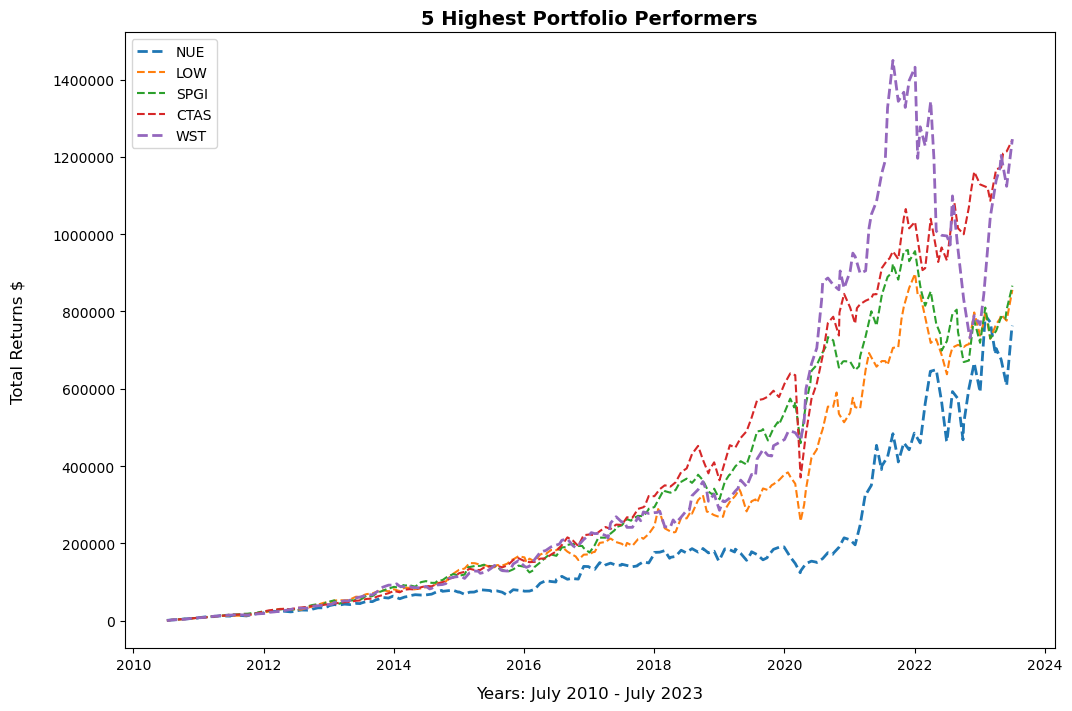

In [52]:
# first_index = result[0][0]
# x0 = all_dates_values[first_index]
# y0 = all_total_values[first_index]
# second_index = result[1][0]
# x1 = all_dates_values[first_index]
# y1 = all_total_values[first_index]

plt.figure(figsize = (12, 8))
plt.title("5 Highest Portfolio Performers", fontsize= 14.0, fontweight='bold')
plt.xlabel("Years: July 2010 - July 2023", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Total Returns $", labelpad = 20, fontsize= 12.0)
plt.plot(all_dates_values[indexes_list[0]], all_total_values[indexes_list[0]], linestyle = "--", lw = 2)
plt.plot(all_dates_values[indexes_list[1]], all_total_values[indexes_list[1]], linestyle = "--")
plt.plot(all_dates_values[indexes_list[2]], all_total_values[indexes_list[2]], linestyle = "--")
plt.plot(all_dates_values[indexes_list[3]], all_total_values[indexes_list[3]], linestyle = "--")
plt.plot(all_dates_values[indexes_list[4]], all_total_values[indexes_list[4]], linestyle = "--", lw = 2)
plt.ticklabel_format(axis = 'y', style='plain')

plt.legend([result[0][1], result[1][1], result[2][1], result[3][1], result[4][1]])
plt.show();
#plt.plot(x1, y1, linestyle = "--")

## From the all_total_values list: now find the 7 stocks that have the highest total portfolio value

In [53]:
highest_7 = {}
for count, values_list in enumerate(all_total_values):
    key = no_date_df.columns[count]
    highest_7[key] = round(values_list[-1], 2)

    
sorted_7 = sorted(highest_7.items(), key=lambda item: item[1])
max_7 = sorted_7[-7:]
max_7

[('SHW', 667189.32),
 ('GWW', 672610.19),
 ('NUE', 763229.27),
 ('LOW', 855957.95),
 ('SPGI', 866742.23),
 ('CTAS', 1244057.38),
 ('WST', 1245830.58)]

## Get the 7 keys in your list of the 7 highest portfolio earners

In [54]:
max_7list = []
[max_7list.append(key[0]) for key in max_7]
max_7list

['SHW', 'GWW', 'NUE', 'LOW', 'SPGI', 'CTAS', 'WST']

In [55]:
ticks_dict = {}
for count, values_list in enumerate(all_total_values):
    key = no_date_df.columns[count]
    ticks_dict[count] = key
ticks_dict

indexes_7list = [list(ticks_dict.values()).index(ticker) for ticker in max_7list]
result = list(zip(indexes_7list, max_7list))
print(indexes_7list)
result

[53, 31, 46, 39, 55, 20, 62]


[(53, 'SHW'),
 (31, 'GWW'),
 (46, 'NUE'),
 (39, 'LOW'),
 (55, 'SPGI'),
 (20, 'CTAS'),
 (62, 'WST')]

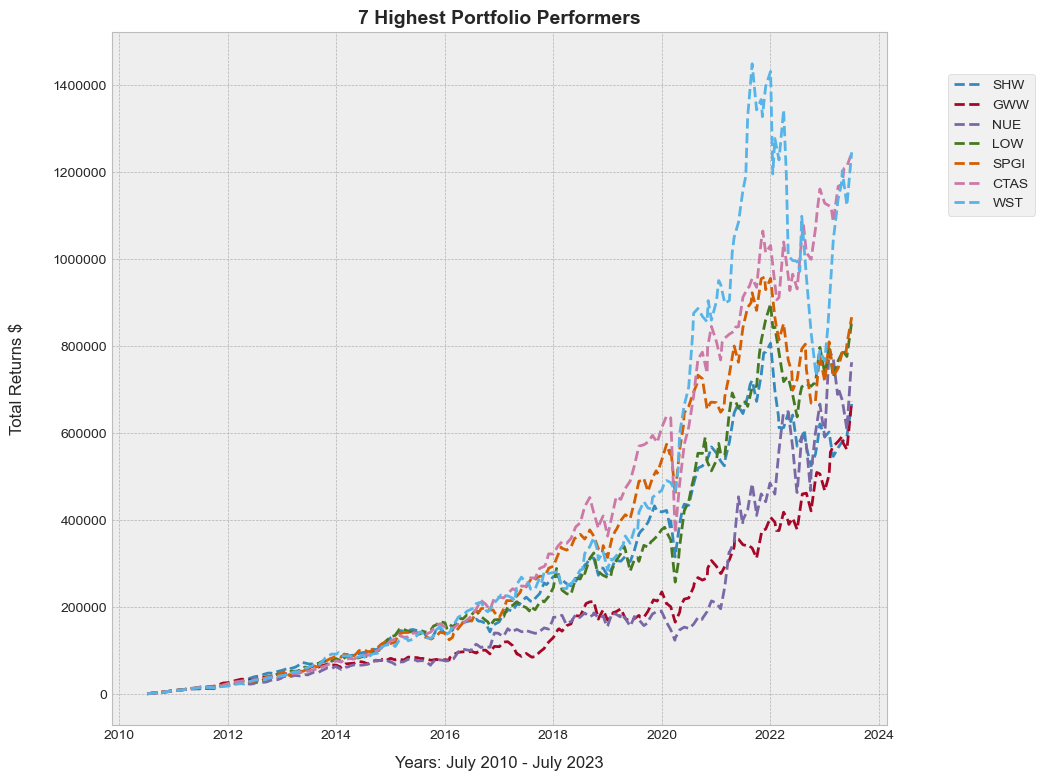

<Figure size 640x480 with 0 Axes>

In [56]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.style.use("bmh")

plt.figure(figsize = (10, 9))
plt.title("7 Highest Portfolio Performers", fontsize= 14.0, fontweight='bold')
plt.xlabel("Years: July 2010 - July 2023", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Total Returns $", labelpad = 20, fontsize= 12.0)
plt.plot(all_dates_values[indexes_7list[0]], all_total_values[indexes_7list[0]], linestyle = "--", label = result[0][1], lw = 2)
plt.plot(all_dates_values[indexes_7list[1]], all_total_values[indexes_7list[1]], linestyle = "--", label = result[1][1], lw = 2)
plt.plot(all_dates_values[indexes_7list[2]], all_total_values[indexes_7list[2]], linestyle = "--", label = result[2][1], lw = 2)
plt.plot(all_dates_values[indexes_7list[3]], all_total_values[indexes_7list[3]], linestyle = "--", label = result[3][1], lw = 2)
plt.plot(all_dates_values[indexes_7list[4]], all_total_values[indexes_7list[4]], linestyle = "--", label = result[4][1], lw = 2)
plt.plot(all_dates_values[indexes_7list[5]], all_total_values[indexes_7list[5]], linestyle = "--", label = result[5][1], lw = 2)
plt.plot(all_dates_values[indexes_7list[6]], all_total_values[indexes_7list[6]], linestyle = "--", label = result[6][1], lw = 2)
plt.ticklabel_format(axis = 'y', style='plain')

plt.draw() # Draw the figure so you can find the positon of the legend.

plt.legend(bbox_to_anchor=(1.2, 0.95))
plt.show()
plt.savefig("7 Highest Portfolio Performers.jpg");

In [57]:
lowest_7 = {}
for count, values_list in enumerate(all_total_values):
    key = no_date_df.columns[count]
    lowest_7[key] = round(values_list[-1], 2)

    
sorted_7 = sorted(lowest_7.items(), key=lambda item: item[1])
lowest_7 = sorted_7[:7]
lowest_7

[('WBA', 149896.61),
 ('SWK', 193433.18),
 ('MMM', 201595.84),
 ('BEN', 218527.21),
 ('FRT', 241341.99),
 ('IBM', 270371.31),
 ('CHRW', 277994.3)]

In [58]:
lowest_7list = []
[lowest_7list.append(key[0]) for key in lowest_7]
lowest_7list

['WBA', 'SWK', 'MMM', 'BEN', 'FRT', 'IBM', 'CHRW']

In [59]:
ticks_dict = {}
for count, values_list in enumerate(all_total_values):
    key = no_date_df.columns[count]
    ticks_dict[count] = key
ticks_dict

low_indexes_7list = [list(ticks_dict.values()).index(ticker) for ticker in lowest_7list]
result = list(zip(low_indexes_7list, lowest_7list))
print(low_indexes_7list)
result

[60, 56, 43, 9, 28, 33, 16]


[(60, 'WBA'),
 (56, 'SWK'),
 (43, 'MMM'),
 (9, 'BEN'),
 (28, 'FRT'),
 (33, 'IBM'),
 (16, 'CHRW')]

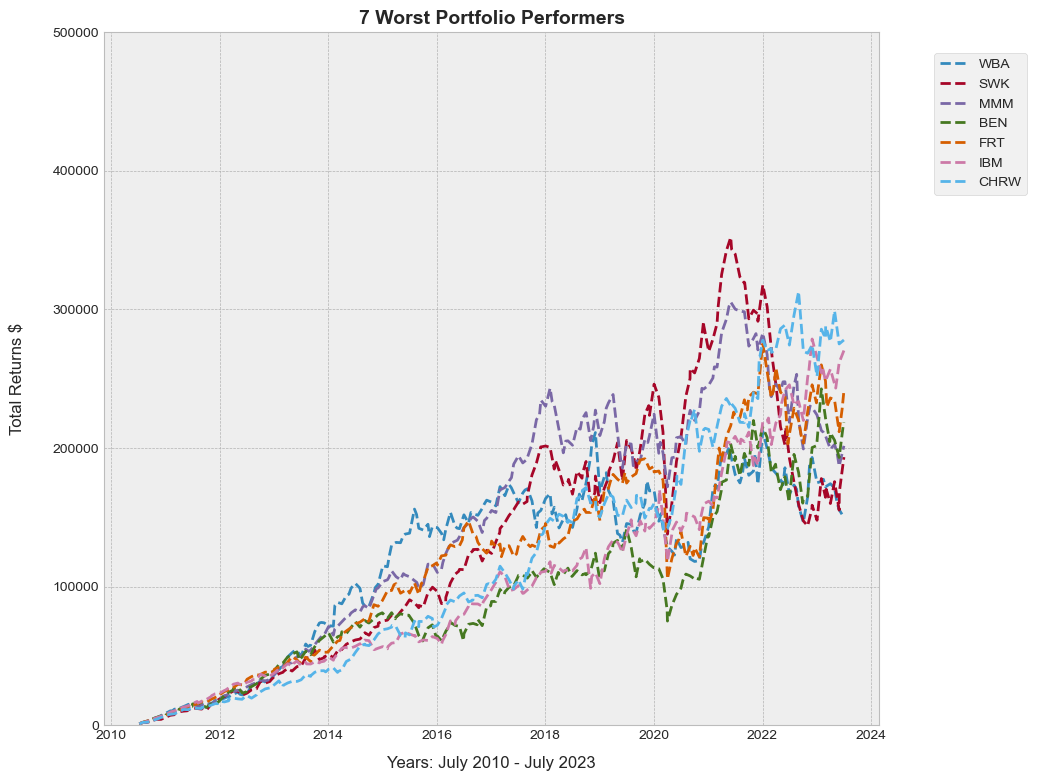

In [60]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.style.use("bmh")

plt.figure(figsize = (10, 9))
plt.title("7 Worst Portfolio Performers", fontsize= 14.0, fontweight='bold')
plt.xlabel("Years: July 2010 - July 2023", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Total Returns $", labelpad = 20, fontsize= 12.0)
plt.plot(all_dates_values[low_indexes_7list[0]], all_total_values[low_indexes_7list[0]], linestyle = "--", label = result[0][1], lw = 2)
plt.plot(all_dates_values[low_indexes_7list[1]], all_total_values[low_indexes_7list[1]], linestyle = "--", label = result[1][1], lw = 2)
plt.plot(all_dates_values[low_indexes_7list[2]], all_total_values[low_indexes_7list[2]], linestyle = "--", label = result[2][1], lw = 2)
plt.plot(all_dates_values[low_indexes_7list[3]], all_total_values[low_indexes_7list[3]], linestyle = "--", label = result[3][1], lw = 2)
plt.plot(all_dates_values[low_indexes_7list[4]], all_total_values[low_indexes_7list[4]], linestyle = "--", label = result[4][1], lw = 2)
plt.plot(all_dates_values[low_indexes_7list[5]], all_total_values[low_indexes_7list[5]], linestyle = "--", label = result[5][1], lw = 2)
plt.plot(all_dates_values[low_indexes_7list[6]], all_total_values[low_indexes_7list[6]], linestyle = "--", label = result[6][1], lw = 2)
plt.ticklabel_format(axis = 'y', style='plain')
plt.ylim(0, 500000)

plt.draw()
plt.legend(bbox_to_anchor=(1.2, 0.98))
plt.show();

In [61]:
winners_5string = " ".join(max_list)
winners_5string

'NUE LOW SPGI CTAS WST'

In [62]:
tickers = yf.Tickers(winners_5string)

In [63]:
lst_of_top_5_dfs_profits = []
for symbol in max_list:
    df_symbol = tickers.tickers[symbol].financials.T
    df_profit_revenue = df_symbol[["Gross Profit", "Total Revenue"]].copy()
    df_list = [symbol for i in range(len(df_profit_revenue.index))]
    df_profit_revenue[symbol] = df_list
# df_profit_revenue
    sorted_idx = df_profit_revenue.index.sort_values()  #sorts the dates in ascending order (they were previously in 
    #descending order)
    df_profit_revenue = df_profit_revenue.loc[sorted_idx]  #puts the rest of the dataframe in sorted order by the ascending dates
# df_profit_revenue
    lst_of_top_5_dfs_profits.append(df_profit_revenue)


lst_of_top_5_dfs_profits[0]

,Gross Profit,Total Revenue,NUE
2019-12-31,2679085000.0,22588858000.0,NUE
2020-12-31,2227950000.0,20139658000.0,NUE
2021-12-31,11025414000.0,36483939000.0,NUE
2022-12-31,12503280000.0,41512467000.0,NUE


## Get the average percentage change of the gross profits and the total revenue for each stock in the top 5 Portfolio Value

In [64]:
lst_of_top_5_dfs_profits[3][["Gross Profit", "Total Revenue"]].pct_change().mean()

Gross Profit     0.089937
Total Revenue    0.076839
dtype: float64

In [65]:
gross_profit_top_5_df = pd.DataFrame()
gr_profit_top_5_list = []
tot_revenue_top_5_list = []

for i in range(len(lst_of_top_5_dfs_profits)):
    gr_profit = lst_of_top_5_dfs_profits[i][["Gross Profit", "Total Revenue"]].pct_change().mean()[0]   
    #gr_profit gets the average percentage change of gross profit year over year for each stock
    tot_revenue = lst_of_top_5_dfs_profits[i][["Gross Profit", "Total Revenue"]].pct_change().mean()[1]
    #tot_revenue gets the average percentage change of total revenue year over year for each stock
    gr_profit_top_5_list.append(gr_profit)
    tot_revenue_top_5_list.append(tot_revenue)
    
gross_profit_top_5_df["Average Percent Change in Gross Profit"] = gr_profit_top_5_list
gross_profit_top_5_df["Average Percent Change in Total Revenue"] = tot_revenue_top_5_list
gross_profit_top_5_df

,Average Percent Change in Gross Profit,Average Percent Change in Total Revenue
0,1.304777,0.280317
1,0.126401,0.108170
2,0.149340,0.191132
3,0.089937,0.076839
4,0.255111,0.168437


In [66]:
max_list

['NUE', 'LOW', 'SPGI', 'CTAS', 'WST']

In [67]:
gross_profit_top_5_df["Tickers"] = max_list[0:len(max_list)]
gross_profit_top_5_df

,Average Percent Change in Gross Profit,Average Percent Change in Total Revenue,Tickers
0,1.304777,0.280317,NUE
1,0.126401,0.108170,LOW
2,0.149340,0.191132,SPGI
3,0.089937,0.076839,CTAS
4,0.255111,0.168437,WST


In [68]:
gross_profit_top_5_df["Average Percent Change in Gross Profit"] = gross_profit_top_5_df["Average Percent Change in Gross Profit"] * 100
gross_profit_top_5_df["Average Percent Change in Total Revenue"] = gross_profit_top_5_df["Average Percent Change in Total Revenue"] * 100
gross_profit_top_5_df

,Average Percent Change in Gross Profit,Average Percent Change in Total Revenue,Tickers
0,130.477713,28.031683,NUE
1,12.640070,10.817000,LOW
2,14.933955,19.113202,SPGI
3,8.993703,7.683950,CTAS
4,25.511114,16.843715,WST


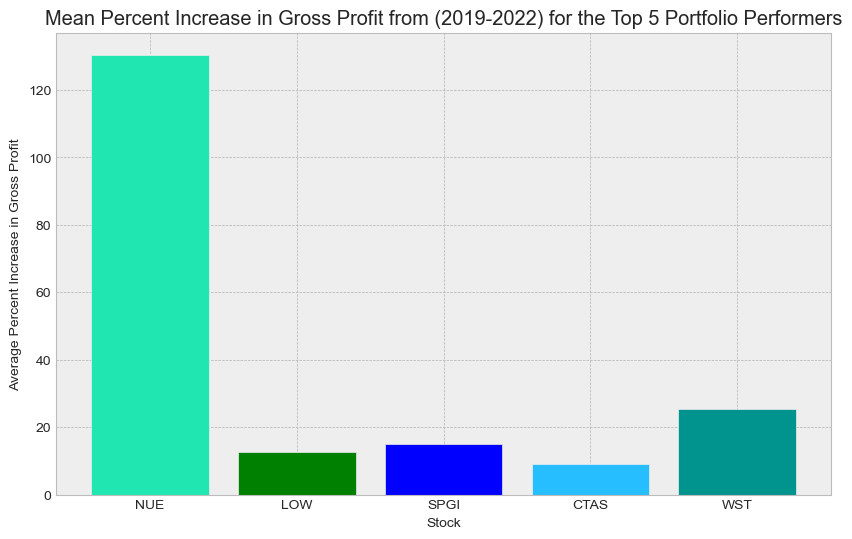

In [69]:
x = gross_profit_top_5_df["Tickers"]
y = gross_profit_top_5_df["Average Percent Change in Gross Profit"]

plt.figure(figsize=(10, 6))
plt.bar(x, y, color=['#20E7B1', 'green', 'blue', '#27BEFF', '#01948F'])
plt.xlabel('Stock')
plt.ylabel('Average Percent Increase in Gross Profit')
plt.title('Mean Percent Increase in Gross Profit from (2019-2022) for the Top 5 Portfolio Performers');
# plt.xticks(rotation=45);

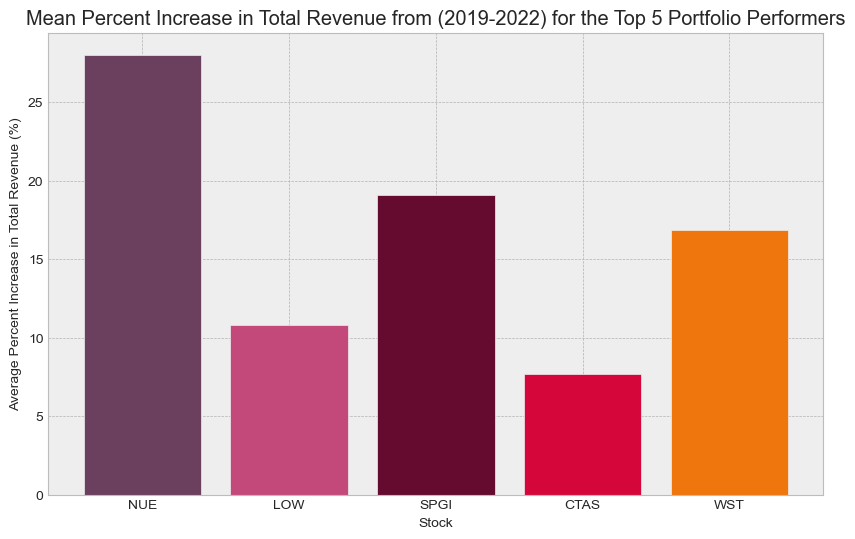

In [70]:
x = gross_profit_top_5_df["Tickers"]
y = gross_profit_top_5_df["Average Percent Change in Total Revenue"]

plt.figure(figsize=(10, 6))
plt.bar(x, y, color=['#6B3F5E', '#C4497B', '#660B30', '#D5073A', '#EF760C'])
plt.xlabel('Stock')
plt.ylabel('Average Percent Increase in Total Revenue (%)')
plt.title('Mean Percent Increase in Total Revenue from (2019-2022) for the Top 5 Portfolio Performers');
# plt.xticks(rotation=45);

In [71]:
df.head(194)

,ABT,ADM,ADP,AFL,ALB,AOS,APD,ATO,BDX,BEN,...,SYY,TGT,TROW,WBA,WMT,WST,XOM,Date,Month,Year
0,17.27,18.99,26.03,17.00,34.52,7.04,46.04,19.44,54.94,19.20,...,20.28,35.20,31.40,19.11,36.57,16.40,35.32,2010-07-08 00:00:00-04:00,7,2010
1,17.24,19.00,26.26,17.32,34.58,7.16,46.68,19.43,54.55,19.53,...,20.40,35.08,31.93,19.30,36.76,16.55,35.30,2010-07-09 00:00:00-04:00,7,2010
2,17.16,18.97,26.43,17.26,33.92,7.10,46.30,19.47,54.25,19.40,...,20.35,34.60,31.87,19.12,37.27,16.44,35.40,2010-07-12 00:00:00-04:00,7,2010
3,17.27,19.19,26.76,17.61,35.18,7.41,47.47,19.75,54.60,20.03,...,20.62,35.11,32.77,19.78,37.58,16.66,35.69,2010-07-13 00:00:00-04:00,7,2010
4,17.33,19.13,26.89,17.44,34.80,7.32,47.03,19.66,54.65,19.82,...,20.64,34.94,32.35,20.12,37.44,16.40,35.59,2010-07-14 00:00:00-04:00,7,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,18.68,26.37,34.84,20.06,50.68,9.03,63.01,24.31,64.60,26.65,...,20.30,36.38,45.96,28.44,40.13,20.93,52.12,2011-04-06 00:00:00-04:00,4,2011
190,18.61,26.31,34.94,19.88,50.56,8.94,62.27,23.95,64.57,26.45,...,20.23,35.42,45.96,28.52,40.14,20.72,52.48,2011-04-07 00:00:00-04:00,4,2011
191,18.61,25.44,34.63,19.66,50.45,8.79,62.68,23.91,64.41,26.55,...,19.86,35.36,45.91,28.29,39.79,20.45,52.59,2011-04-08 00:00:00-04:00,4,2011
192,18.77,25.66,34.61,19.72,49.68,8.76,62.12,23.70,65.00,26.42,...,20.08,35.16,45.54,28.52,40.01,20.51,52.11,2011-04-11 00:00:00-04:00,4,2011


In [72]:
keys_list = list(no_date_df.columns)
keys_list

['ABT',
 'ADM',
 'ADP',
 'AFL',
 'ALB',
 'AOS',
 'APD',
 'ATO',
 'BDX',
 'BEN',
 'BF-B',
 'BRO',
 'CAH',
 'CAT',
 'CB',
 'CHD',
 'CHRW',
 'CINF',
 'CL',
 'CLX',
 'CTAS',
 'CVX',
 'DOV',
 'ECL',
 'ED',
 'EMR',
 'ESS',
 'EXPD',
 'FRT',
 'GD',
 'GPC',
 'GWW',
 'HRL',
 'IBM',
 'ITW',
 'JNJ',
 'KMB',
 'KO',
 'LIN',
 'LOW',
 'MCD',
 'MDT',
 'MKC',
 'MMM',
 'NDSN',
 'NEE',
 'NUE',
 'O',
 'PEP',
 'PG',
 'PNR',
 'PPG',
 'ROP',
 'SHW',
 'SJM',
 'SPGI',
 'SWK',
 'SYY',
 'TGT',
 'TROW',
 'WBA',
 'WMT',
 'WST',
 'XOM']

In [73]:
div_dict["ADM"]

Date
2010-08-17 00:00:00-04:00    0.150
2010-11-16 00:00:00-05:00    0.150
2011-02-15 00:00:00-05:00    0.160
2011-05-17 00:00:00-04:00    0.160
2011-08-16 00:00:00-04:00    0.160
2011-11-15 00:00:00-05:00    0.175
2012-02-14 00:00:00-05:00    0.175
2012-05-15 00:00:00-04:00    0.175
2012-08-14 00:00:00-04:00    0.175
2012-11-13 00:00:00-05:00    0.175
2013-02-15 00:00:00-05:00    0.190
2013-05-14 00:00:00-04:00    0.190
2013-08-20 00:00:00-04:00    0.190
2013-11-12 00:00:00-05:00    0.190
2014-02-18 00:00:00-05:00    0.240
2014-05-13 00:00:00-04:00    0.240
2014-08-19 00:00:00-04:00    0.240
2014-11-18 00:00:00-05:00    0.240
2015-02-12 00:00:00-05:00    0.280
2015-05-19 00:00:00-04:00    0.280
2015-08-17 00:00:00-04:00    0.280
2015-11-16 00:00:00-05:00    0.280
2016-02-11 00:00:00-05:00    0.300
2016-05-16 00:00:00-04:00    0.300
2016-08-15 00:00:00-04:00    0.300
2016-11-14 00:00:00-05:00    0.300
2017-02-16 00:00:00-05:00    0.320
2017-05-16 00:00:00-04:00    0.320
2017-08-15 00:0

In [74]:
df["Date"][0:4]

0   2010-07-08 00:00:00-04:00
1   2010-07-09 00:00:00-04:00
2   2010-07-12 00:00:00-04:00
3   2010-07-13 00:00:00-04:00
Name: Date, dtype: datetime64[ns, America/New_York]

In [75]:
div_prices_list = []

i = 1
for date in list(df["Date"]):
    if date <= div_dict["ADM"].index[0]:
        div_prices_list.append(div_dict["ADM"][0])
    elif date >= div_dict["ADM"].index[-1]:
        div_prices_list.append(div_dict["ADM"][-1])
    elif date != div_dict["ADM"].index[i]:
        div_prices_list.append(div_dict["ADM"][i-1])
    else:
        i = i + 1
        div_prices_list.append(div_dict["ADM"][i-1])
        
div_prices_list

[0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,

In [76]:
np.unique(div_prices_list, return_index=True)

(array([0.15 , 0.16 , 0.175, 0.19 , 0.24 , 0.28 , 0.3  , 0.32 , 0.335,
        0.35 , 0.36 , 0.37 , 0.4  , 0.45 ]),
 array([   0,  154,  344,  657,  909, 1158, 1409, 1665, 1917, 2167, 2416,
        2665, 2917, 3169], dtype=int64))

In [77]:
new_df_abt = df[["ADM", "Date"]]
new_df_abt["Dividend Amount"] = div_prices_list
new_df_abt.head(155)

C:\Users\Irochka\AppData\Local\Temp\ipykernel_78416\3432664107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_abt["Dividend Amount"] = div_prices_list


,ADM,Date,Dividend Amount
0,18.99,2010-07-08 00:00:00-04:00,0.15
1,19.00,2010-07-09 00:00:00-04:00,0.15
2,18.97,2010-07-12 00:00:00-04:00,0.15
3,19.19,2010-07-13 00:00:00-04:00,0.15
4,19.13,2010-07-14 00:00:00-04:00,0.15
...,...,...,...
150,25.87,2011-02-09 00:00:00-05:00,0.15
151,25.45,2011-02-10 00:00:00-05:00,0.15
152,26.01,2011-02-11 00:00:00-05:00,0.15
153,26.32,2011-02-14 00:00:00-05:00,0.15


In [78]:
#div_dict["ABT"]

## get_dividends() is a function that will get the specific dividend amount for each individual stock for every single date in the entire dataframe

In [79]:
def get_dividends(key):
    my_divs_list = []
    i = 1
    for date in list(df["Date"]):
            if date <= div_dict[key].index[0]:
                my_divs_list.append(div_dict[key][0])
            elif date >= div_dict[key].index[-1]:
                my_divs_list.append(div_dict[key][-1])
            elif date != div_dict[key].index[i]:
                my_divs_list.append(div_dict[key][i-1])
            else:
                i = i + 1
                my_divs_list.append(div_dict[key][i-1])
                
    return my_divs_list

## Make a dictionary that will store all the dividend amounts (using the function above) for each individual stock

In [80]:
dict_of_divs = {}
# bros_list = ["ABT", "ADM"]

for key in keys_list:
    dict_of_divs[key] = get_dividends(key)

dict_of_divs["WBA"]


[0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,
 0.175,


## Add the dividend amounts for each stock to the dataframe and make new columns for each addition

In [81]:
new_dvds_df = df.copy()

for key in keys_list:
    new_dvds_df[f"{key} dividend amt"] = dict_of_divs[key]

In [82]:
new_dvds_df

,ABT,ADM,ADP,AFL,ALB,AOS,APD,ATO,BDX,BEN,...,SJM dividend amt,SPGI dividend amt,SWK dividend amt,SYY dividend amt,TGT dividend amt,TROW dividend amt,WBA dividend amt,WMT dividend amt,WST dividend amt,XOM dividend amt
0,17.27,18.99,26.03,17.00,34.52,7.04,46.04,19.44,54.94,19.20,...,0.40,0.235,0.34,0.25,0.25,0.27,0.175,0.303,0.08,0.44
1,17.24,19.00,26.26,17.32,34.58,7.16,46.68,19.43,54.55,19.53,...,0.40,0.235,0.34,0.25,0.25,0.27,0.175,0.303,0.08,0.44
2,17.16,18.97,26.43,17.26,33.92,7.10,46.30,19.47,54.25,19.40,...,0.40,0.235,0.34,0.25,0.25,0.27,0.175,0.303,0.08,0.44
3,17.27,19.19,26.76,17.61,35.18,7.41,47.47,19.75,54.60,20.03,...,0.40,0.235,0.34,0.25,0.25,0.27,0.175,0.303,0.08,0.44
4,17.33,19.13,26.89,17.44,34.80,7.32,47.03,19.66,54.65,19.82,...,0.40,0.235,0.34,0.25,0.25,0.27,0.175,0.303,0.08,0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,108.50,75.16,219.79,69.41,223.09,72.48,299.53,115.60,264.01,26.71,...,1.02,0.900,0.80,0.49,1.08,1.22,0.480,0.570,0.19,0.91
3268,106.71,76.32,218.73,69.79,229.26,72.08,297.07,116.56,261.92,26.89,...,1.02,0.900,0.80,0.49,1.08,1.22,0.480,0.570,0.19,0.91
3269,106.86,77.01,219.70,69.52,229.02,70.76,287.97,117.84,260.30,26.53,...,1.02,0.900,0.80,0.49,1.08,1.22,0.480,0.570,0.19,0.91
3270,106.69,76.63,221.65,69.25,227.57,70.31,287.84,116.79,258.87,26.02,...,1.02,0.900,0.80,0.50,1.08,1.22,0.480,0.570,0.19,0.91


In [83]:
new_dvds_df["TROW"]

0        31.40
1        31.93
2        31.87
3        32.77
4        32.35
         ...  
3267    112.02
3268    113.26
3269    111.91
3270    109.81
3271    110.23
Name: TROW, Length: 3272, dtype: float64

In [84]:
div_dict["TROW"]

Date
2010-09-10 00:00:00-04:00    0.27
2010-12-10 00:00:00-05:00    0.27
2011-03-11 00:00:00-05:00    0.31
2011-06-10 00:00:00-04:00    0.31
2011-09-12 00:00:00-04:00    0.31
2011-12-12 00:00:00-05:00    0.31
2012-03-13 00:00:00-04:00    0.34
2012-06-12 00:00:00-04:00    0.34
2012-09-11 00:00:00-04:00    0.34
2012-12-12 00:00:00-05:00    0.34
2012-12-13 00:00:00-05:00    1.00
2013-03-11 00:00:00-04:00    0.38
2013-06-11 00:00:00-04:00    0.38
2013-09-11 00:00:00-04:00    0.38
2013-12-12 00:00:00-05:00    0.38
2014-03-12 00:00:00-04:00    0.44
2014-06-11 00:00:00-04:00    0.44
2014-09-11 00:00:00-04:00    0.44
2014-12-12 00:00:00-05:00    0.44
2015-03-12 00:00:00-04:00    0.52
2015-04-07 00:00:00-04:00    2.00
2015-06-11 00:00:00-04:00    0.52
2015-09-11 00:00:00-04:00    0.52
2015-12-14 00:00:00-05:00    0.52
2016-03-14 00:00:00-04:00    0.54
2016-06-13 00:00:00-04:00    0.54
2016-09-13 00:00:00-04:00    0.54
2016-12-13 00:00:00-05:00    0.54
2017-03-14 00:00:00-04:00    0.57
2017-06-1

In [85]:
for key in keys_list:
    new_dvds_df[f"{key} dvd %"] = (( (new_dvds_df[f"{key} dividend amt"]) * 4) / new_dvds_df[f"{key}"]) * 100
    
new_dvds_df.iloc[-1]
    

C:\Users\Irochka\AppData\Local\Temp\ipykernel_78416\3141445941.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dvds_df[f"{key} dvd %"] = (( (new_dvds_df[f"{key} dividend amt"]) * 4) / new_dvds_df[f"{key}"]) * 100
C:\Users\Irochka\AppData\Local\Temp\ipykernel_78416\3141445941.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dvds_df[f"{key} dvd %"] = (( (new_dvds_df[f"{key} dividend amt"]) * 4) / new_dvds_df[f"{key}"]) * 100
C:\Users\Irochka\AppData\Local\Temp\ipykernel_78416\3141445941.py:2: PerformanceWarning: Dat

ABT             105.84
ADM               77.6
ADP             218.74
AFL              69.64
ALB             237.52
                ...   
TROW dvd %    4.427107
WBA dvd %     6.715635
WMT dvd %     1.490683
WST dvd %     0.204626
XOM dvd %     3.557467
Name: 3271, Length: 195, dtype: object

In [86]:
# new_dvds_df.to_excel('output.xlsx', index=False)

In [87]:
# # Check which columns have timezones datetime64[ns, UTC] 
# new_dvds_df.dtypes

# # Remove timezone from columns
# new_dvds_df['Date'] = new_dvds_df['Date'].dt.tz_localize(None)

# # Export to excel
# new_dvds_df.to_excel('filename.xlsx')

In [88]:
new_dvds_df[["TROW", "Date"]].iloc[-1]

TROW                       110.23
Date    2023-07-07 00:00:00-04:00
Name: 3271, dtype: object

In [89]:
new_dvds_df[["TROW", "Date", "TROW dividend amt"]].iloc[-1]

TROW                                    110.23
Date                 2023-07-07 00:00:00-04:00
TROW dividend amt                         1.22
Name: 3271, dtype: object

In [90]:
div_dict["TROW"]

Date
2010-09-10 00:00:00-04:00    0.27
2010-12-10 00:00:00-05:00    0.27
2011-03-11 00:00:00-05:00    0.31
2011-06-10 00:00:00-04:00    0.31
2011-09-12 00:00:00-04:00    0.31
2011-12-12 00:00:00-05:00    0.31
2012-03-13 00:00:00-04:00    0.34
2012-06-12 00:00:00-04:00    0.34
2012-09-11 00:00:00-04:00    0.34
2012-12-12 00:00:00-05:00    0.34
2012-12-13 00:00:00-05:00    1.00
2013-03-11 00:00:00-04:00    0.38
2013-06-11 00:00:00-04:00    0.38
2013-09-11 00:00:00-04:00    0.38
2013-12-12 00:00:00-05:00    0.38
2014-03-12 00:00:00-04:00    0.44
2014-06-11 00:00:00-04:00    0.44
2014-09-11 00:00:00-04:00    0.44
2014-12-12 00:00:00-05:00    0.44
2015-03-12 00:00:00-04:00    0.52
2015-04-07 00:00:00-04:00    2.00
2015-06-11 00:00:00-04:00    0.52
2015-09-11 00:00:00-04:00    0.52
2015-12-14 00:00:00-05:00    0.52
2016-03-14 00:00:00-04:00    0.54
2016-06-13 00:00:00-04:00    0.54
2016-09-13 00:00:00-04:00    0.54
2016-12-13 00:00:00-05:00    0.54
2017-03-14 00:00:00-04:00    0.57
2017-06-1

In [91]:
max_list

['NUE', 'LOW', 'SPGI', 'CTAS', 'WST']

In [92]:
lst_of_dvd_pcts = []
for stock in max_list:
    avg_dvd_pct = new_dvds_df[f"{stock} dvd %"].mean()
    lst_of_dvd_pcts.append(avg_dvd_pct)

new_dvd_pct_df = pd.DataFrame()
new_dvd_pct_df["Avg Dividend Percent"] = lst_of_dvd_pcts

new_dvd_pct_df["Tickers"] = max_list
new_dvd_pct_df

    
    
    
    
    

,Avg Dividend Percent,Tickers
0,3.488157,NUE
1,2.006441,LOW
2,1.831513,SPGI
3,4.859446,CTAS
4,0.813444,WST


In [93]:
all_dvd_pcts = []
for stock in keys_list:
    if stock not in max_list:
        mean_dvd_pct = new_dvds_df[f"{stock} dvd %"].mean()
        all_dvd_pcts.append(mean_dvd_pct)

mean_dvd_of_all_stocks = sum(all_dvd_pcts) / len(all_dvd_pcts)  
mean_dvd_of_all_stocks

2.8977694068815807

In [94]:
mean_dict = {'Avg Dividend Percent': mean_dvd_of_all_stocks, 'Tickers': "All Div Aristocrats"}
new_dvd_pct_df = new_dvd_pct_df.append(mean_dict, ignore_index = True) 

C:\Users\Irochka\AppData\Local\Temp\ipykernel_78416\1453583226.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dvd_pct_df = new_dvd_pct_df.append(mean_dict, ignore_index = True)


In [95]:
new_dvd_pct_df

,Avg Dividend Percent,Tickers
0,3.488157,NUE
1,2.006441,LOW
2,1.831513,SPGI
3,4.859446,CTAS
4,0.813444,WST
5,2.897769,All Div Aristocrats


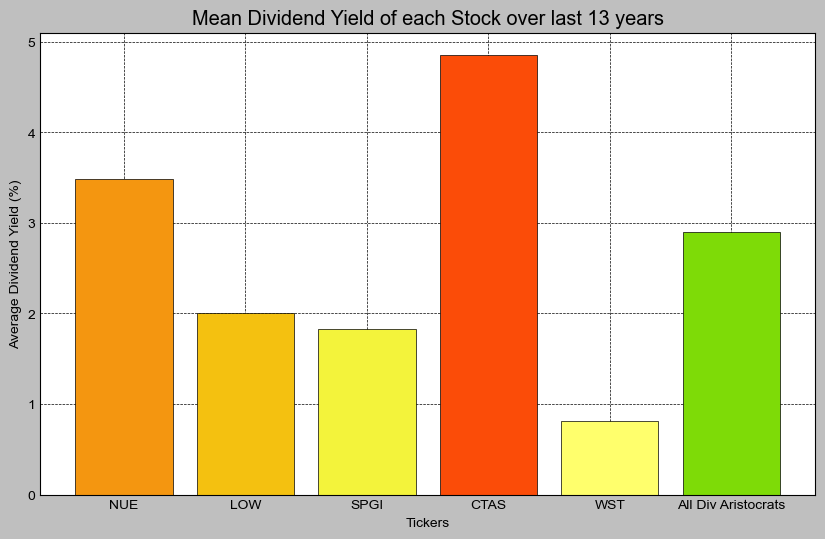

In [96]:
plt.style.use("grayscale")
plt.figure(figsize=(10, 6))
plt.bar(new_dvd_pct_df["Tickers"], new_dvd_pct_df["Avg Dividend Percent"], color=['#F49610', '#F4C110', '#F3F33B', '#FB4C08', '#FFFF6C', '#7EDB07'])
plt.xlabel('Tickers')
plt.ylabel('Average Dividend Yield (%)')
plt.title('Mean Dividend Yield of each Stock over last 13 years', color = "black");

In [97]:
new_dvds_df["Date"]

0      2010-07-08 00:00:00-04:00
1      2010-07-09 00:00:00-04:00
2      2010-07-12 00:00:00-04:00
3      2010-07-13 00:00:00-04:00
4      2010-07-14 00:00:00-04:00
                  ...           
3267   2023-06-30 00:00:00-04:00
3268   2023-07-03 00:00:00-04:00
3269   2023-07-05 00:00:00-04:00
3270   2023-07-06 00:00:00-04:00
3271   2023-07-07 00:00:00-04:00
Name: Date, Length: 3272, dtype: datetime64[ns, America/New_York]

In [98]:
condition_2021 = new_dvds_df['Date'].dt.year >= 2021
df_2021 = new_dvds_df[condition_2021]
df_2021["Date"]


2641   2021-01-04 00:00:00-05:00
2642   2021-01-05 00:00:00-05:00
2643   2021-01-06 00:00:00-05:00
2644   2021-01-07 00:00:00-05:00
2645   2021-01-08 00:00:00-05:00
                  ...           
3267   2023-06-30 00:00:00-04:00
3268   2023-07-03 00:00:00-04:00
3269   2023-07-05 00:00:00-04:00
3270   2023-07-06 00:00:00-04:00
3271   2023-07-07 00:00:00-04:00
Name: Date, Length: 631, dtype: datetime64[ns, America/New_York]

In [99]:
lst_of_dvd_pcts = []
for stock in max_list:
    avg_dvd_pct = df_2021[f"{stock} dvd %"].mean()
    lst_of_dvd_pcts.append(avg_dvd_pct)

new_dvd_pct_2021_df = pd.DataFrame()
new_dvd_pct_2021_df["Avg Dividend Percent"] = lst_of_dvd_pcts

new_dvd_pct_2021_df["Tickers"] = max_list
new_dvd_pct_2021_df

,Avg Dividend Percent,Tickers
0,1.679344,NUE
1,1.727013,LOW
2,0.879500,SPGI
3,1.117001,CTAS
4,0.221265,WST


In [100]:
all_dvd_pcts = []
for stock in keys_list:
    if stock not in max_list:
        mean_dvd_pct = df_2021[f"{stock} dvd %"].mean()
        all_dvd_pcts.append(mean_dvd_pct)

mean_dvd_of_all_stocks = sum(all_dvd_pcts) / len(all_dvd_pcts)  
mean_dvd_of_all_stocks

2.4493724765621527

In [101]:
mean_dict = {'Avg Dividend Percent': mean_dvd_of_all_stocks, 'Tickers': "All Div Aristocrats"}
new_dvd_pct_2021_df = new_dvd_pct_2021_df.append(mean_dict, ignore_index = True) 

C:\Users\Irochka\AppData\Local\Temp\ipykernel_78416\2575451583.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dvd_pct_2021_df = new_dvd_pct_2021_df.append(mean_dict, ignore_index = True)


In [102]:
new_dvd_pct_2021_df

,Avg Dividend Percent,Tickers
0,1.679344,NUE
1,1.727013,LOW
2,0.879500,SPGI
3,1.117001,CTAS
4,0.221265,WST
5,2.449372,All Div Aristocrats


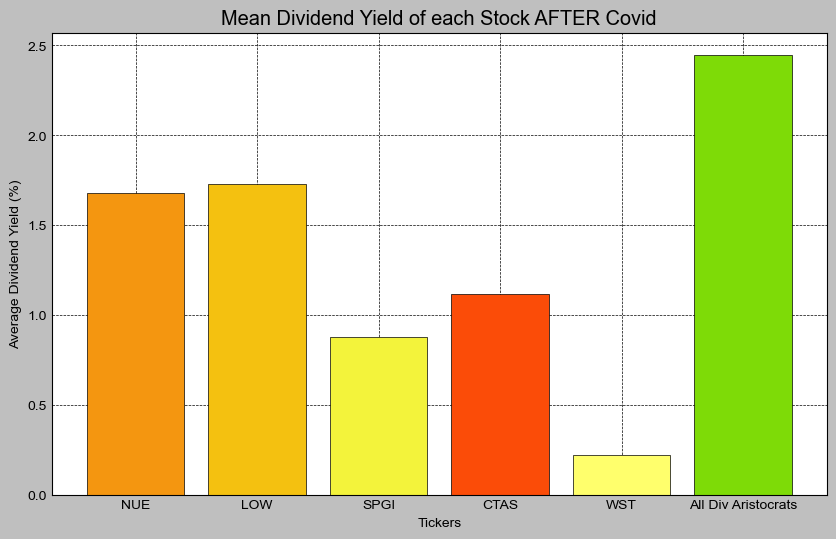

In [103]:
plt.style.use("grayscale")
plt.figure(figsize=(10, 6))
plt.bar(new_dvd_pct_2021_df["Tickers"], new_dvd_pct_2021_df["Avg Dividend Percent"], color=['#F49610', '#F4C110', '#F3F33B', '#FB4C08', '#FFFF6C', '#7EDB07'])
plt.xlabel('Tickers')
plt.ylabel('Average Dividend Yield (%)')
plt.title('Mean Dividend Yield of each Stock AFTER Covid', color = "black");

In [104]:
all_portfolio = {}
for count, values_list in enumerate(all_total_values):
    key = no_date_df.columns[count]
    all_portfolio[key] = round(values_list[-1], 2)

    
sorted_all = sorted(all_portfolio.items(), key=lambda item: item[1])
sorted_all

[('WBA', 149896.61),
 ('SWK', 193433.18),
 ('MMM', 201595.84),
 ('BEN', 218527.21),
 ('FRT', 241341.99),
 ('IBM', 270371.31),
 ('CHRW', 277994.3),
 ('CL', 279971.54),
 ('MDT', 305863.64),
 ('ESS', 319204.12),
 ('ECL', 331911.09),
 ('HRL', 342065.99),
 ('BF-B', 343191.31),
 ('PNR', 347298.93),
 ('SJM', 352624.83),
 ('EMR', 362169.2),
 ('PPG', 368020.73),
 ('KO', 369073.35),
 ('KMB', 370355.22),
 ('CLX', 370451.86),
 ('TROW', 372433.77),
 ('BDX', 390366.85),
 ('CB', 396560.37),
 ('SYY', 398699.51),
 ('JNJ', 399277.58),
 ('ED', 400010.88),
 ('MKC', 414714.97),
 ('EXPD', 415037.19),
 ('GD', 415967.95),
 ('WMT', 426332.07),
 ('CAH', 432417.33),
 ('TGT', 432482.36),
 ('O', 432712.61),
 ('XOM', 436708.55),
 ('PG', 438374.09),
 ('ADM', 446175.2),
 ('CVX', 448860.44),
 ('PEP', 452703.01),
 ('AFL', 476594.16),
 ('CINF', 477810.73),
 ('ROP', 484904.73),
 ('DOV', 495335.34),
 ('ATO', 500480.27),
 ('GPC', 501462.89),
 ('CHD', 501906.22),
 ('ABT', 508301.03),
 ('NDSN', 523347.4),
 ('APD', 548416.26)

In [105]:
lst_of_dvd_pcts = []
for stock in max_7list:
    avg_dvd_pct = new_dvds_df[f"{stock} dvd %"].mean()
    lst_of_dvd_pcts.append(avg_dvd_pct)

dvd_7_pct_df = pd.DataFrame()
dvd_7_pct_df["Avg Dividend Percent"] = lst_of_dvd_pcts

dvd_7_pct_df["Tickers"] = max_7list
dvd_7_pct_df


,Avg Dividend Percent,Tickers
0,1.170477,SHW
1,1.970264,GWW
2,3.488157,NUE
3,2.006441,LOW
4,1.831513,SPGI
5,4.859446,CTAS
6,0.813444,WST


In [106]:
max_7list

['SHW', 'GWW', 'NUE', 'LOW', 'SPGI', 'CTAS', 'WST']

In [107]:
all_dvd_pcts = [new_dvds_df[f"{stock} dvd %"].mean() for stock in keys_list if stock not in max_7list]

mean_of_all_stocks = round(sum(all_dvd_pcts) / len(all_dvd_pcts), 2)
mean_of_all_stocks

2.94

In [108]:
mean_dict = {'Avg Dividend Percent': mean_of_all_stocks, 'Tickers': "Other Div Aristocrats"}
dvd_7_pct_df = dvd_7_pct_df.append(mean_dict, ignore_index = True) 

C:\Users\Irochka\AppData\Local\Temp\ipykernel_78416\1893392383.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dvd_7_pct_df = dvd_7_pct_df.append(mean_dict, ignore_index = True)


In [109]:
dvd_7_pct_df["Avg Dividend Percent"] = dvd_7_pct_df["Avg Dividend Percent"].round(3)
dvd_7_pct_df

,Avg Dividend Percent,Tickers
0,1.170,SHW
1,1.970,GWW
2,3.488,NUE
3,2.006,LOW
4,1.832,SPGI
5,4.859,CTAS
6,0.813,WST
7,2.940,Other Div Aristocrats


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'SHW'),
  Text(1, 0, 'GWW'),
  Text(2, 0, 'NUE'),
  Text(3, 0, 'LOW'),
  Text(4, 0, 'SPGI'),
  Text(5, 0, 'CTAS'),
  Text(6, 0, 'WST'),
  Text(7, 0, 'Other Div Aristocrats')])

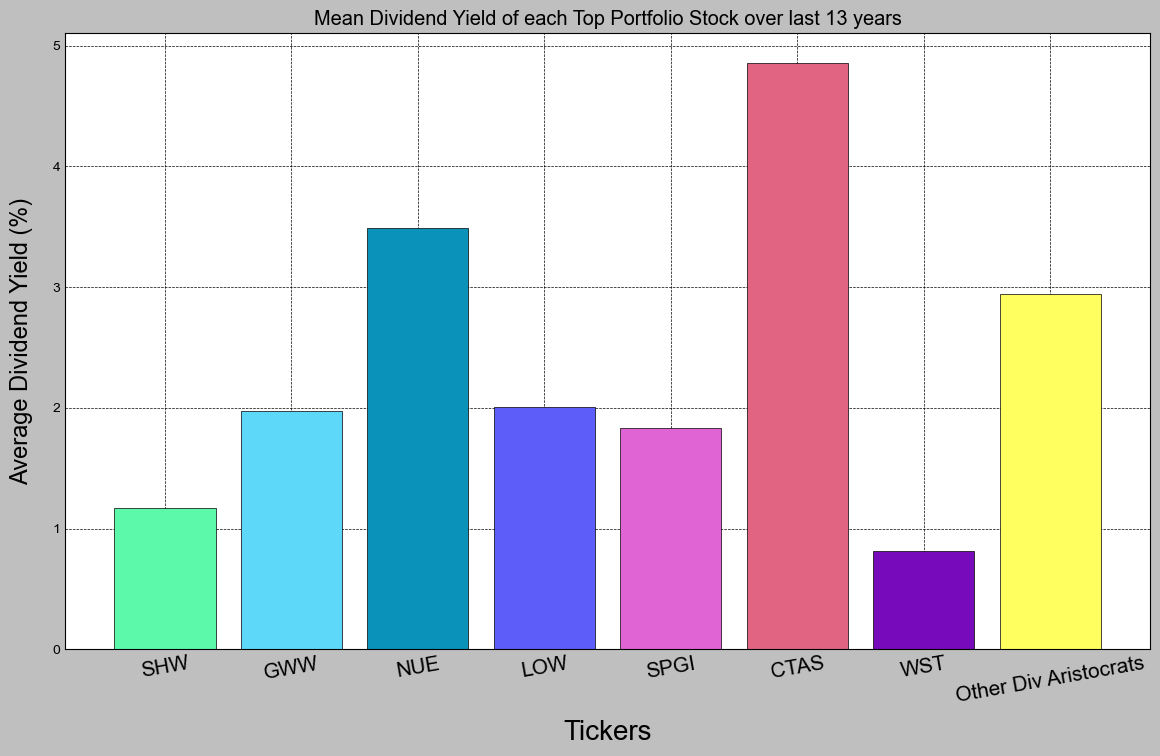

In [110]:
plt.style.use("grayscale")
plt.figure(figsize=(14, 8))
plt.bar(dvd_7_pct_df["Tickers"], dvd_7_pct_df["Avg Dividend Percent"], 
        color=['#5DF9AB', '#5DD8F9', '#0B92BB', '#5D5DF9', '#E164D5', '#E16482', '#770BBB', '#FFFF60'])
plt.xlabel('Tickers', labelpad = 10, fontsize= 20.0)
plt.ylabel('Average Dividend Yield (%)', labelpad = 14.0, fontsize = 17.0)
plt.title('Mean Dividend Yield of each Top Portfolio Stock over last 13 years', color = "black");
plt.xticks(fontsize = 15.0, rotation = 10)

In [111]:
lst_of_dvd_pcts = [df_2021[f"{stock} dvd %"].mean() for stock in max_7list]

dvd_2021_pct_df = pd.DataFrame()
dvd_2021_pct_df["Avg Dividend Percent after COVID"] = lst_of_dvd_pcts

dvd_2021_pct_df["Tickers"] = max_7list
dvd_2021_pct_df

,Avg Dividend Percent after COVID,Tickers
0,0.910102,SHW
1,1.351859,GWW
2,1.679344,NUE
3,1.727013,LOW
4,0.879500,SPGI
5,1.117001,CTAS
6,0.221265,WST


In [112]:
all_dvd_pcts = [df_2021[f"{stock} dvd %"].mean() for stock in keys_list if stock not in max_7list]

mean_of_all_stocks = round(sum(all_dvd_pcts) / len(all_dvd_pcts), 2)
mean_of_all_stocks

2.5

In [113]:
mean_dict = {'Avg Dividend Percent after COVID': mean_of_all_stocks, 'Tickers': "Other Div Aristocrats"}
dvd_2021_pct_df = dvd_2021_pct_df.append(mean_dict, ignore_index = True) 

C:\Users\Irochka\AppData\Local\Temp\ipykernel_78416\3492820161.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dvd_2021_pct_df = dvd_2021_pct_df.append(mean_dict, ignore_index = True)


In [114]:
dvd_2021_pct_df["Avg Dividend Percent after COVID"] = dvd_2021_pct_df["Avg Dividend Percent after COVID"].round(3)
dvd_2021_pct_df

,Avg Dividend Percent after COVID,Tickers
0,0.910,SHW
1,1.352,GWW
2,1.679,NUE
3,1.727,LOW
4,0.880,SPGI
5,1.117,CTAS
6,0.221,WST
7,2.500,Other Div Aristocrats


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'SHW'),
  Text(0, 1, 'GWW'),
  Text(0, 2, 'NUE'),
  Text(0, 3, 'LOW'),
  Text(0, 4, 'SPGI'),
  Text(0, 5, 'CTAS'),
  Text(0, 6, 'WST'),
  Text(0, 7, 'Other Div Aristocrats')])

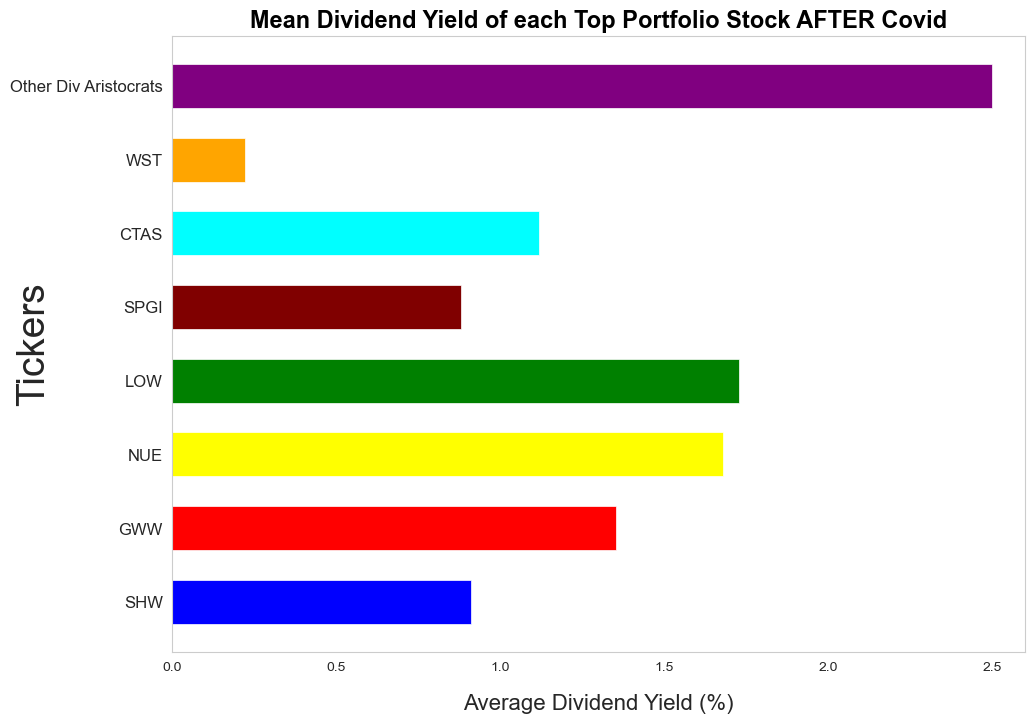

In [115]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.style.use("fast")
plt.figure(figsize=(11, 8))
plt.barh(dvd_2021_pct_df["Tickers"], dvd_2021_pct_df["Avg Dividend Percent after COVID"], height = 0.6, 
        color = ["blue", "red", "yellow", "green", "maroon", "cyan", "orange", "purple"])
plt.xlabel('Average Dividend Yield (%)', labelpad = 14.0, fontsize = 16.0)
plt.xlim(0, 2.6)
plt.ylabel('Tickers', fontsize= 28.0, labelpad = -30)
plt.title('Mean Dividend Yield of each Top Portfolio Stock AFTER Covid', color = "black", fontsize = 17, fontweight = "bold");
plt.yticks(fontsize = 12.0)

In [116]:
condition_2018 = new_dvds_df["Date"].dt.year >= 2018
df_2018 = new_dvds_df[condition_2018]
df_2018.columns[0:75]
df_2018["Date"]

1885   2018-01-02 00:00:00-05:00
1886   2018-01-03 00:00:00-05:00
1887   2018-01-04 00:00:00-05:00
1888   2018-01-05 00:00:00-05:00
1889   2018-01-08 00:00:00-05:00
                  ...           
3267   2023-06-30 00:00:00-04:00
3268   2023-07-03 00:00:00-04:00
3269   2023-07-05 00:00:00-04:00
3270   2023-07-06 00:00:00-04:00
3271   2023-07-07 00:00:00-04:00
Name: Date, Length: 1387, dtype: datetime64[ns, America/New_York]

In [117]:
lst_of_dvd_pcts = [df_2018[f"{stock} dvd %"].mean() for stock in max_7list]

dvd_2018_pct_df = pd.DataFrame()
dvd_2018_pct_df["Avg Dividend Percent since 2018"] = lst_of_dvd_pcts

dvd_2018_pct_df["Tickers"] = max_7list
dvd_2018_pct_df

,Avg Dividend Percent since 2018,Tickers
0,0.907311,SHW
1,1.688244,GWW
2,2.550384,NUE
3,1.861675,LOW
4,0.936200,SPGI
5,2.648050,CTAS
6,0.350534,WST


In [118]:
all_dvd_pcts = [df_2018[f"{stock} dvd %"].mean() for stock in keys_list if stock not in max_7list]

mean_of_all_stocks = round(sum(all_dvd_pcts) / len(all_dvd_pcts), 2)
mean_of_all_stocks

2.7

In [119]:
mean_dict = {'Avg Dividend Percent since 2018': mean_of_all_stocks, 'Tickers': "Other Div Aristocrats"}
dvd_2018_pct_df = dvd_2018_pct_df.append(mean_dict, ignore_index = True) 

C:\Users\Irochka\AppData\Local\Temp\ipykernel_78416\1006007825.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dvd_2018_pct_df = dvd_2018_pct_df.append(mean_dict, ignore_index = True)


In [120]:
dvd_2018_pct_df["Avg Dividend Percent since 2018"] = dvd_2018_pct_df["Avg Dividend Percent since 2018"].round(3)
dvd_2018_pct_df

,Avg Dividend Percent since 2018,Tickers
0,0.907,SHW
1,1.688,GWW
2,2.550,NUE
3,1.862,LOW
4,0.936,SPGI
5,2.648,CTAS
6,0.351,WST
7,2.700,Other Div Aristocrats


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'SHW'),
  Text(0, 1, 'GWW'),
  Text(0, 2, 'NUE'),
  Text(0, 3, 'LOW'),
  Text(0, 4, 'SPGI'),
  Text(0, 5, 'CTAS'),
  Text(0, 6, 'WST'),
  Text(0, 7, 'Other Div Aristocrats')])

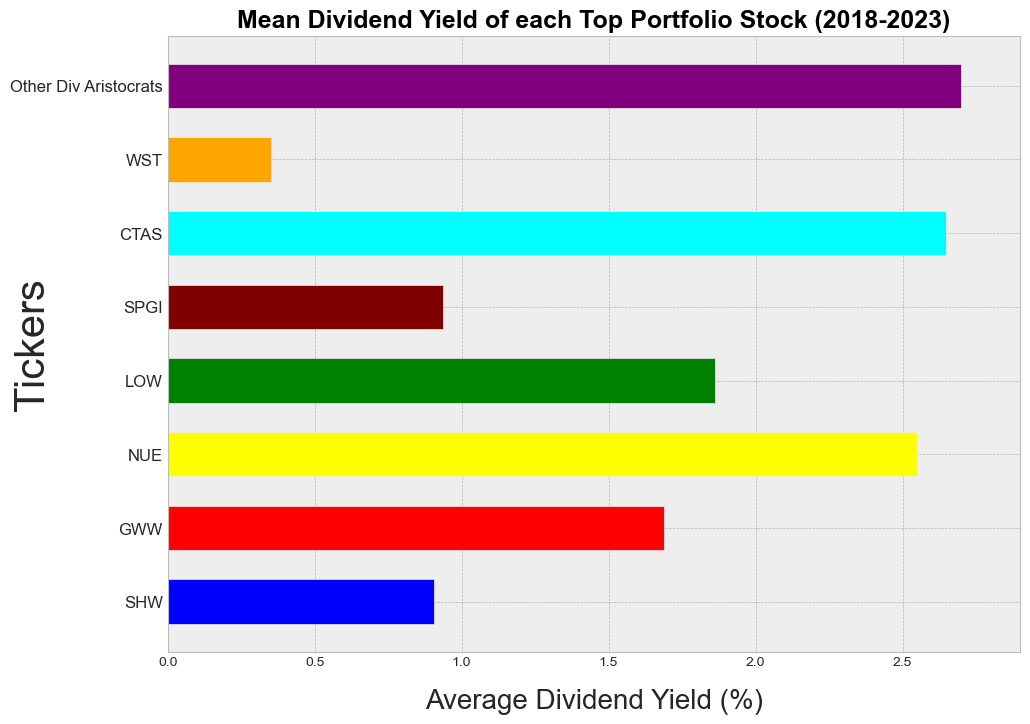

In [121]:
plt.style.use("bmh")
plt.figure(figsize=(11, 8))
plt.barh(dvd_2018_pct_df["Tickers"], dvd_2018_pct_df["Avg Dividend Percent since 2018"], height = 0.6, 
        color = ["blue", "red", "yellow", "green", "maroon", "cyan", "orange", "purple"])
plt.xlabel('Average Dividend Yield (%)', labelpad = 14.0, fontsize = 20.0)
plt.xlim(0, 2.9)
plt.ylabel('Tickers', fontsize= 30.0, labelpad = -30)
plt.title('Mean Dividend Yield of each Top Portfolio Stock (2018-2023)', color = "black", fontsize = 18, fontweight = "bold");
plt.yticks(fontsize = 12.0)

In [122]:
lowest_7list

['WBA', 'SWK', 'MMM', 'BEN', 'FRT', 'IBM', 'CHRW']

In [123]:
lst_of_low_dvd_pcts = [new_dvds_df[f"{stock} dvd %"].mean() for stock in lowest_7list]

dvd_just_low_pct_df = pd.DataFrame()
dvd_just_low_pct_df["Avg Dividend Percent"] = lst_of_low_dvd_pcts

dvd_just_low_pct_df["Tickers"] = lowest_7list
dvd_just_low_pct_df

,Avg Dividend Percent,Tickers
0,3.493170,WBA
1,2.562109,SWK
2,3.636690,MMM
3,4.109285,BEN
4,4.090665,FRT
5,4.512796,IBM
6,2.581284,CHRW


In [124]:
lst_of_dvd_pcts = [new_dvds_df[f"{stock} dvd %"].mean() for stock in max_7list]

dvd_just_high_pct_df = pd.DataFrame()
dvd_just_high_pct_df["Avg Dividend Percent"] = lst_of_dvd_pcts

dvd_just_high_pct_df["Tickers"] = max_7list
dvd_just_high_pct_df

,Avg Dividend Percent,Tickers
0,1.170477,SHW
1,1.970264,GWW
2,3.488157,NUE
3,2.006441,LOW
4,1.831513,SPGI
5,4.859446,CTAS
6,0.813444,WST


## Merge two dataframes using concat()

In [125]:
dvd_low_high_pct_df = pd.concat([dvd_just_high_pct_df, dvd_just_low_pct_df])

In [126]:
dvd_low_high_pct_df.reset_index(inplace = True, drop = True)

In [127]:
top_lst = ["Top Performer" if x < 7 else "Bottom Performer" for x in range(14)]
top_lst

['Top Performer',
 'Top Performer',
 'Top Performer',
 'Top Performer',
 'Top Performer',
 'Top Performer',
 'Top Performer',
 'Bottom Performer',
 'Bottom Performer',
 'Bottom Performer',
 'Bottom Performer',
 'Bottom Performer',
 'Bottom Performer',
 'Bottom Performer']

In [128]:
dvd_low_high_pct_df["Top vs Bottom"] = top_lst
dvd_low_high_pct_df

,Avg Dividend Percent,Tickers,Top vs Bottom
0,1.170477,SHW,Top Performer
1,1.970264,GWW,Top Performer
2,3.488157,NUE,Top Performer
3,2.006441,LOW,Top Performer
4,1.831513,SPGI,Top Performer
5,4.859446,CTAS,Top Performer
6,0.813444,WST,Top Performer
7,3.493170,WBA,Bottom Performer
8,2.562109,SWK,Bottom Performer
9,3.636690,MMM,Bottom Performer


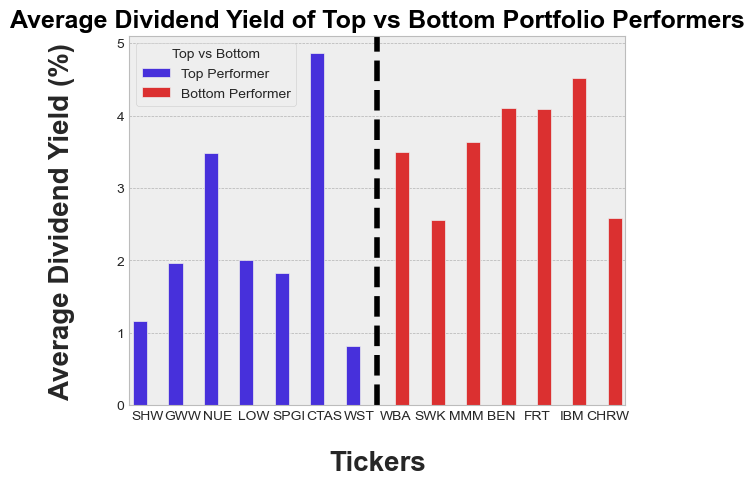

In [129]:
sns.barplot(x = "Tickers", y = "Avg Dividend Percent", data = dvd_low_high_pct_df,
            hue = "Top vs Bottom", palette = ["#3213F7" ,"#F71313"])
plt.axvline(x = 6.5, color ='black', linewidth = 4, linestyle ="--") 
plt.ylabel('Average Dividend Yield (%)', labelpad = 30.0, fontsize = 20.0, fontweight = "bold")
plt.xlabel('Tickers', fontsize= 20.0, labelpad = 20, fontweight = "bold")
plt.title('Average Dividend Yield of Top vs Bottom Portfolio Performers', color = "black", fontsize = 18, fontweight = "bold");



In [130]:
lst_of_low_dvd_pcts = [df_2018[f"{stock} dvd %"].mean() for stock in lowest_7list]

dvd_just_low_2018_pct_df = pd.DataFrame()
dvd_just_low_2018_pct_df["Avg Dividend Percent"] = lst_of_low_dvd_pcts
dvd_just_low_2018_pct_df["Tickers"] = lowest_7list

lst_of_high_dvd_pcts = [df_2018[f"{stock} dvd %"].mean() for stock in max_7list]

dvd_just_high_2018_pct_df = pd.DataFrame()
dvd_just_high_2018_pct_df["Avg Dividend Percent"] = lst_of_high_dvd_pcts
dvd_just_high_2018_pct_df["Tickers"] = max_7list

#merging two 2018 dataframes together 
dvd_low_high_2018_pct_df = pd.concat([dvd_just_high_2018_pct_df, dvd_just_low_2018_pct_df])
dvd_low_high_2018_pct_df.reset_index(inplace = True, drop = True)
top_lst = ["Top Performer" if x < 7 else "Bottom Performer" for x in range(14)]
dvd_low_high_2018_pct_df["Top vs Bottom"] = top_lst
dvd_low_high_2018_pct_df






,Avg Dividend Percent,Tickers,Top vs Bottom
0,0.907311,SHW,Top Performer
1,1.688244,GWW,Top Performer
2,2.550384,NUE,Top Performer
3,1.861675,LOW,Top Performer
4,0.936200,SPGI,Top Performer
5,2.648050,CTAS,Top Performer
6,0.350534,WST,Top Performer
7,4.365483,WBA,Bottom Performer
8,2.342579,SWK,Bottom Performer
9,4.035669,MMM,Bottom Performer


In [131]:
dvd_low_high_2018_pct_df["Avg Dividend Percent"] = dvd_low_high_2018_pct_df["Avg Dividend Percent"].round(3)
dvd_low_high_2018_pct_df

,Avg Dividend Percent,Tickers,Top vs Bottom
0,0.907,SHW,Top Performer
1,1.688,GWW,Top Performer
2,2.550,NUE,Top Performer
3,1.862,LOW,Top Performer
4,0.936,SPGI,Top Performer
5,2.648,CTAS,Top Performer
6,0.351,WST,Top Performer
7,4.365,WBA,Bottom Performer
8,2.343,SWK,Bottom Performer
9,4.036,MMM,Bottom Performer


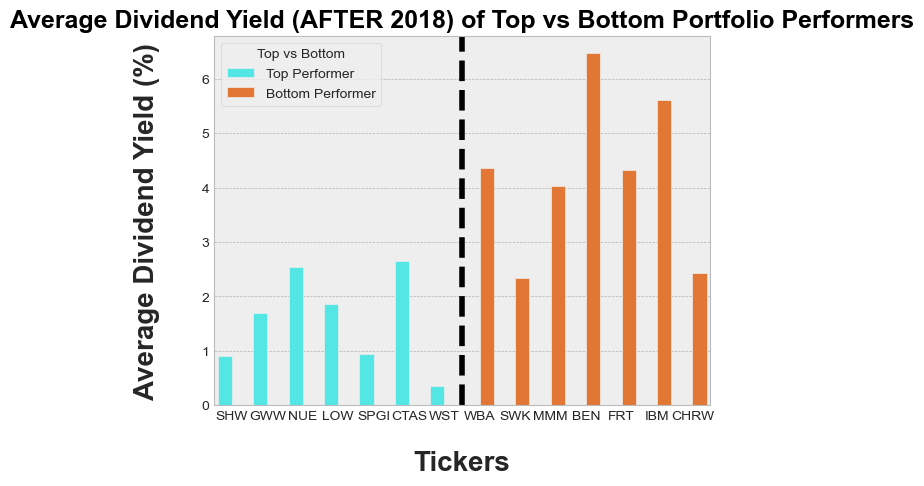

In [132]:
sns.barplot(x = "Tickers", y = "Avg Dividend Percent", data = dvd_low_high_2018_pct_df,
            hue = "Top vs Bottom", palette = ["#3AFFFC" ,"#FF6F17"])
plt.axvline(x = 6.5, color ='black', linewidth = 4, linestyle = "--") 
plt.ylabel('Average Dividend Yield (%)', labelpad = 30.0, fontsize = 20.0, fontweight = "bold")
plt.xlabel('Tickers', fontsize= 20.0, labelpad = 20, fontweight = "bold")
plt.title('Average Dividend Yield (AFTER 2018) of Top vs Bottom Portfolio Performers', color = "black", fontsize = 18, fontweight = "bold");


In [133]:
new_dvds_df.columns

Index(['ABT', 'ADM', 'ADP', 'AFL', 'ALB', 'AOS', 'APD', 'ATO', 'BDX', 'BEN',
       ...
       'SJM dvd %', 'SPGI dvd %', 'SWK dvd %', 'SYY dvd %', 'TGT dvd %',
       'TROW dvd %', 'WBA dvd %', 'WMT dvd %', 'WST dvd %', 'XOM dvd %'],
      dtype='object', length=195)

# Get the number of stocks that pay a 3% dividend yield or more and less than 3% yield and plot this result in a pie chart 

In [134]:
all_yields = [new_dvds_df[f"{stock} dvd %"].mean() for stock in keys_list]

just_yields_df = pd.DataFrame({"Tickers": keys_list, "Average Dividend Yields": all_yields})
just_yields_df["Average Dividend Yields"] = just_yields_df["Average Dividend Yields"].round(3)
just_yields_df

,Tickers,Average Dividend Yields
0,ABT,2.517
1,ADM,3.048
2,ADP,2.744
3,AFL,2.938
4,ALB,1.539
...,...,...
59,TROW,3.513
60,WBA,3.493
61,WMT,2.604
62,WST,0.813


In [135]:
just_yields_df["Greater than 3%"] = just_yields_df["Average Dividend Yields"].apply(lambda pct: "At least 3% Dividend Yield"
                                                                                    if pct >= 3 else "Less than 3% Dividend Yield")
just_yields_df


,Tickers,Average Dividend Yields,Greater than 3%
0,ABT,2.517,Less than 3% Dividend Yield
1,ADM,3.048,At least 3% Dividend Yield
2,ADP,2.744,Less than 3% Dividend Yield
3,AFL,2.938,Less than 3% Dividend Yield
4,ALB,1.539,Less than 3% Dividend Yield
...,...,...,...
59,TROW,3.513,At least 3% Dividend Yield
60,WBA,3.493,At least 3% Dividend Yield
61,WMT,2.604,Less than 3% Dividend Yield
62,WST,0.813,Less than 3% Dividend Yield


In [136]:
greater_than_3 = just_yields_df.groupby('Greater than 3%')['Tickers'].count()   #this is a series
greater_than_3_df = greater_than_3.to_frame()  #I cast the series into a dataframe 
greater_than_3_df

,Tickers
Greater than 3%,
At least 3% Dividend Yield,30
Less than 3% Dividend Yield,34


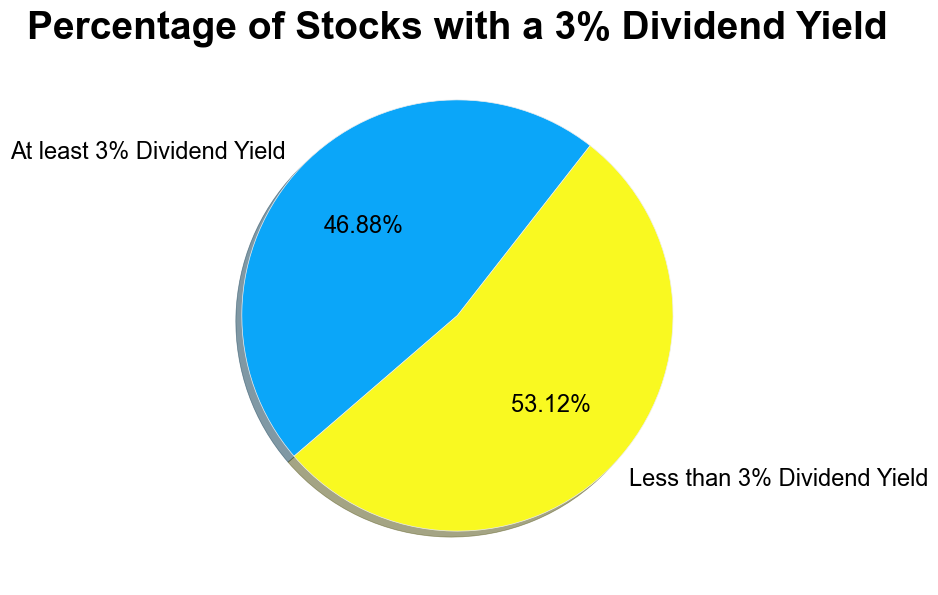

In [137]:
data = greater_than_3_df["Tickers"]
labels = greater_than_3_df.index

c = ["#0BA6F9","#F9F921"]  
#e = [0.03, 0]  # e works like this: If e is not *None*, it is a len(x) array which specifies the fraction 
                        #of the radius with which to offset, or separate from each wedge.

plt.figure(figsize=(8,7))  
plt.pie(data, labels=labels, colors=c, autopct = '%.2f%%', shadow = True, startangle = 52,  textprops={'fontsize': 17, 'color': 'black'})
plt.title("Percentage of Stocks with a 3% Dividend Yield", fontsize = 28, color = 'black', fontweight = "bold");
# plt.savefig("Percentage of Stocks with a 3% Dividend Yield.jpg")

In [138]:
def how_high_yield(pct):
    if pct > 3:
        result = "Greater than a 3% Dividend Yield"
    elif pct >= 2:
        result = "Between a 2-3% Dividend Yield"
    else:
        result = "Less than a 2% Dividend Yield"
    return result

just_yields_df["Category of Dividend Yield"] = just_yields_df["Average Dividend Yields"].apply(how_high_yield)
just_yields_df
    

,Tickers,Average Dividend Yields,Greater than 3%,Category of Dividend Yield
0,ABT,2.517,Less than 3% Dividend Yield,Between a 2-3% Dividend Yield
1,ADM,3.048,At least 3% Dividend Yield,Greater than a 3% Dividend Yield
2,ADP,2.744,Less than 3% Dividend Yield,Between a 2-3% Dividend Yield
3,AFL,2.938,Less than 3% Dividend Yield,Between a 2-3% Dividend Yield
4,ALB,1.539,Less than 3% Dividend Yield,Less than a 2% Dividend Yield
...,...,...,...,...
59,TROW,3.513,At least 3% Dividend Yield,Greater than a 3% Dividend Yield
60,WBA,3.493,At least 3% Dividend Yield,Greater than a 3% Dividend Yield
61,WMT,2.604,Less than 3% Dividend Yield,Between a 2-3% Dividend Yield
62,WST,0.813,Less than 3% Dividend Yield,Less than a 2% Dividend Yield


In [139]:
category_yield = just_yields_df.groupby('Category of Dividend Yield')["Category of Dividend Yield"].count() 
category_yield_df = category_yield.to_frame()  #I cast the series into a dataframe 
category_yield_df

,Category of Dividend Yield
Category of Dividend Yield,
Between a 2-3% Dividend Yield,21
Greater than a 3% Dividend Yield,30
Less than a 2% Dividend Yield,13


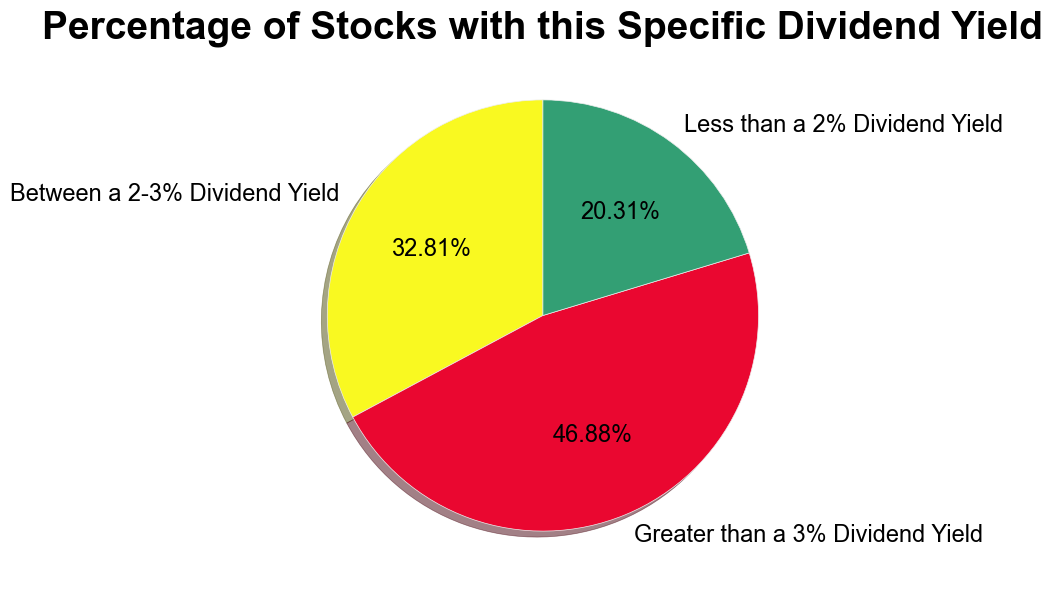

In [140]:
data = category_yield_df["Category of Dividend Yield"]
labels = category_yield_df.index

c = ["#F9F921","#EA0730", "#339F74"]  
e = [0, 0.1, 0]  # e works like this: If e is not *None*, it is a len(x) array which specifies the fraction 
                        #of the radius with which to offset, or separate from each wedge.

plt.figure(figsize=(8,7))  
plt.pie(data, labels=labels, colors=c, autopct = '%.2f%%', shadow = True, startangle = 90,  textprops={'fontsize': 17, 'color': 'black'})
plt.title("Percentage of Stocks with this Specific Dividend Yield", fontsize = 28, color = 'black', fontweight = "bold");
# plt.savefig("Percentage of Stocks with this Specific Dividend Yield.jpg")

In [141]:
df_2018["Date"]

1885   2018-01-02 00:00:00-05:00
1886   2018-01-03 00:00:00-05:00
1887   2018-01-04 00:00:00-05:00
1888   2018-01-05 00:00:00-05:00
1889   2018-01-08 00:00:00-05:00
                  ...           
3267   2023-06-30 00:00:00-04:00
3268   2023-07-03 00:00:00-04:00
3269   2023-07-05 00:00:00-04:00
3270   2023-07-06 00:00:00-04:00
3271   2023-07-07 00:00:00-04:00
Name: Date, Length: 1387, dtype: datetime64[ns, America/New_York]

In [142]:
new_dvds_df["Date"]

0      2010-07-08 00:00:00-04:00
1      2010-07-09 00:00:00-04:00
2      2010-07-12 00:00:00-04:00
3      2010-07-13 00:00:00-04:00
4      2010-07-14 00:00:00-04:00
                  ...           
3267   2023-06-30 00:00:00-04:00
3268   2023-07-03 00:00:00-04:00
3269   2023-07-05 00:00:00-04:00
3270   2023-07-06 00:00:00-04:00
3271   2023-07-07 00:00:00-04:00
Name: Date, Length: 3272, dtype: datetime64[ns, America/New_York]

In [143]:
df_2018["WBA dvd %"].mean()

4.365482779986763

## After that, get the number of stocks that pay a 3% dividend yield or more and less than 3% yield AFTER 2018 and plot this result in a pie chart 

In [144]:
all_2018_yields = [df_2018[f"{stock} dvd %"].mean() for stock in keys_list]

just_yields_2018_df = pd.DataFrame({"Tickers": keys_list, "Average Dividend Yields After 2018": all_2018_yields})
just_yields_2018_df

,Tickers,Average Dividend Yields After 2018
0,ABT,1.713972
1,ADM,2.985355
2,ADP,2.188295
3,AFL,2.633565
4,ALB,1.332263
...,...,...
59,TROW,3.396881
60,WBA,4.365483
61,WMT,1.885094
62,WST,0.350534


In [145]:
just_yields_2018_df["Average Dividend Yields After 2018"] = just_yields_2018_df["Average Dividend Yields After 2018"].round(3)
just_yields_2018_df

,Tickers,Average Dividend Yields After 2018
0,ABT,1.714
1,ADM,2.985
2,ADP,2.188
3,AFL,2.634
4,ALB,1.332
...,...,...
59,TROW,3.397
60,WBA,4.365
61,WMT,1.885
62,WST,0.351


In [146]:
#we will use the function "how_high_yield" that we wrote earlier but now apply it to this new column 

just_yields_2018_df["Category of Dividend Yield"] = just_yields_2018_df["Average Dividend Yields After 2018"].apply(how_high_yield)
just_yields_2018_df

,Tickers,Average Dividend Yields After 2018,Category of Dividend Yield
0,ABT,1.714,Less than a 2% Dividend Yield
1,ADM,2.985,Between a 2-3% Dividend Yield
2,ADP,2.188,Between a 2-3% Dividend Yield
3,AFL,2.634,Between a 2-3% Dividend Yield
4,ALB,1.332,Less than a 2% Dividend Yield
...,...,...,...
59,TROW,3.397,Greater than a 3% Dividend Yield
60,WBA,4.365,Greater than a 3% Dividend Yield
61,WMT,1.885,Less than a 2% Dividend Yield
62,WST,0.351,Less than a 2% Dividend Yield


In [147]:
category_2018_yield = just_yields_2018_df.groupby("Category of Dividend Yield")["Category of Dividend Yield"].count() 
category_2018_yield_df = category_2018_yield.to_frame()  #I cast the series into a dataframe 
category_2018_yield_df

,Category of Dividend Yield
Category of Dividend Yield,
Between a 2-3% Dividend Yield,26
Greater than a 3% Dividend Yield,16
Less than a 2% Dividend Yield,22


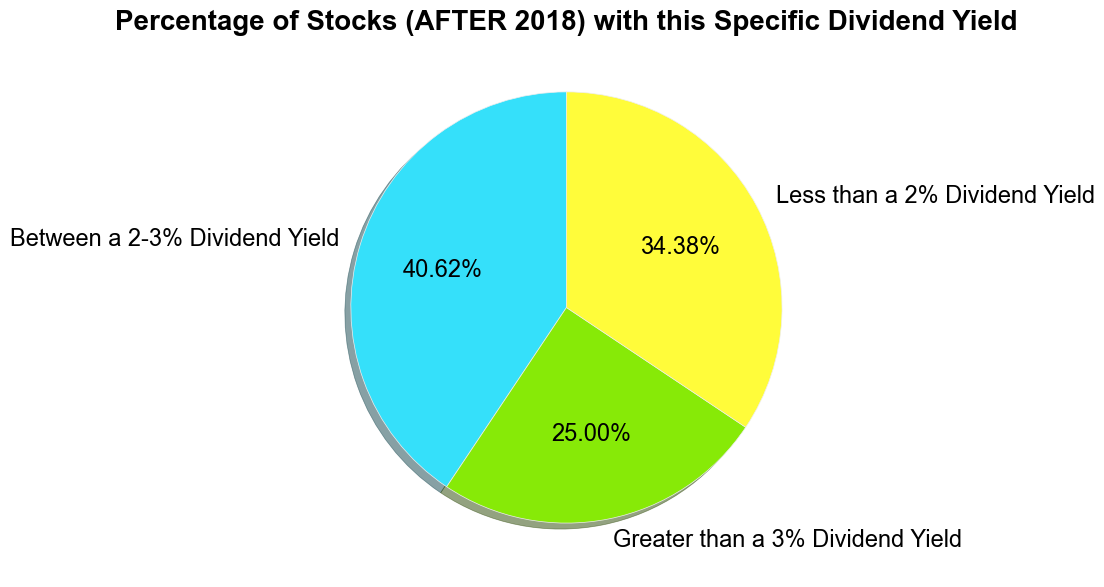

In [148]:
data = category_2018_yield_df["Category of Dividend Yield"]
labels = category_2018_yield_df.index

c = ["#35E0FA","#87EA07", "#FFFC3A"]  
e = [0, 0.1, 0]  # e works like this: If e is not *None*, it is a len(x) array which specifies the fraction 
                        #of the radius with which to offset, or separate from each wedge.

plt.figure(figsize=(8,7))  
plt.pie(data, labels=labels, colors=c, autopct = '%.2f%%', shadow = True, startangle = 90,  textprops={'fontsize': 17, 'color': 'black'})
plt.title("Percentage of Stocks (AFTER 2018) with this Specific Dividend Yield", fontsize = 20, color = 'black', fontweight = "bold");
# plt.savefig("Percentage of Stocks (AFTER 2018) with this Specific Dividend Yield.jpg")

## Then compare dividend growth of top 7 performers vs entire dataset

### Note that we have three major outliers for dividend payments in the dataset: BEN, BF-B, and SPGI 

### BEN, BF-B, and SPGI are major outliers in their dividend growth because they made sporadic one-time cash payments that exceeded all other dividend amounts they've ever paid. That does not really count as dividend growth, so I should take out these outlier dividend payments from BEN, BF-B, and SPGI

In [149]:
#Let's start with BEN and BF-B, we will take out SPGI later

In [150]:
div_dict

{'ABT': Date
 2010-07-13 00:00:00-04:00    0.211112
 2010-10-13 00:00:00-04:00    0.211112
 2011-01-12 00:00:00-05:00    0.211112
 2011-04-13 00:00:00-04:00    0.230304
 2011-07-13 00:00:00-04:00    0.230304
 2011-10-12 00:00:00-04:00    0.230304
 2012-01-11 00:00:00-05:00    0.230304
 2012-04-11 00:00:00-04:00    0.244698
 2012-07-11 00:00:00-04:00    0.244698
 2012-10-11 00:00:00-04:00    0.244698
 2013-01-11 00:00:00-05:00    0.140000
 2013-04-11 00:00:00-04:00    0.140000
 2013-07-11 00:00:00-04:00    0.140000
 2013-10-10 00:00:00-04:00    0.140000
 2014-01-13 00:00:00-05:00    0.220000
 2014-04-11 00:00:00-04:00    0.220000
 2014-07-11 00:00:00-04:00    0.220000
 2014-10-10 00:00:00-04:00    0.220000
 2015-01-13 00:00:00-05:00    0.240000
 2015-04-13 00:00:00-04:00    0.240000
 2015-07-13 00:00:00-04:00    0.240000
 2015-10-13 00:00:00-04:00    0.240000
 2016-01-13 00:00:00-05:00    0.260000
 2016-04-13 00:00:00-04:00    0.260000
 2016-07-13 00:00:00-04:00    0.260000
 2016-10-12 

In [151]:
div_dict["BEN"].drop("2012-12-04 00:00:00-05:00", inplace = True)

In [152]:
div_dict["BEN"].drop("2018-03-28 00:00:00-04:00", inplace = True)

In [153]:
div_dict["BF-B"].drop("2018-03-29 00:00:00-04:00", inplace = True)

In [154]:
div_dict["BF-B"].drop("2021-12-08 00:00:00-05:00", inplace = True)

In [155]:
# div_dict["BF-B"]

In [156]:
keys_list[-4]

'WBA'

In [157]:
unique_vals = div_dict["WBA"].unique()
unique_vals

array([0.175, 0.225, 0.275, 0.315, 0.338, 0.36 , 0.375, 0.4  , 0.44 ,
       0.458, 0.468, 0.478, 0.48 ])

In [158]:
difference = np.diff(div_dict["WBA"].unique())
difference

array([0.05 , 0.05 , 0.04 , 0.023, 0.022, 0.015, 0.025, 0.04 , 0.018,
       0.01 , 0.01 , 0.002])

In [159]:
final_array = (difference / unique_vals[:-1])   #we need the unique_vals up to but not including the last value in the array
final_array

array([0.28571429, 0.22222222, 0.14545455, 0.07301587, 0.06508876,
       0.04166667, 0.06666667, 0.1       , 0.04090909, 0.02183406,
       0.02136752, 0.0041841 ])

In [160]:
final_array = final_array * 100
final_array

array([28.57142857, 22.22222222, 14.54545455,  7.3015873 ,  6.50887574,
        4.16666667,  6.66666667, 10.        ,  4.09090909,  2.18340611,
        2.13675214,  0.41841004])

In [161]:
np.mean(final_array)

9.067698258059192

In [162]:
# div_dict["SPGI"]

## Note that at one point SPGI really paid a $2.50 dividend for a single quarter!!!!!!!

In [163]:
div_dict["SPGI"].unique()

array([0.235, 0.25 , 0.255, 2.5  , 0.28 , 0.3  , 0.33 , 0.36 , 0.41 ,
       0.5  , 0.57 , 0.67 , 0.77 , 0.85 , 0.9  ])

In [164]:
np.diff(div_dict["SPGI"].unique()) / div_dict["SPGI"].unique()[:-1] * 100

array([  6.38297872,   2.        , 880.39215686, -88.8       ,
         7.14285714,  10.        ,   9.09090909,  13.88888889,
        21.95121951,  14.        ,  17.54385965,  14.92537313,
        10.38961039,   5.88235294])

In [165]:
# Note that div_dict[stock] is a Series
# And note that div_dict[stock].unique() returns an Array of all the unique, not sorted values of each stock's Series
# So we can run now numpy methods that calculates the percent increase of dividend growth, and then gets the average 
# of these percents increase
# So, for example: div_dict["WBA"].unique() returns all the unique, not sorted dividend payments of WBA stock
# then, if we use np.diff on div_dict["WBA"].unique(), we will get the difference of each consecutive value 
# in WBA's unique dividend payments array
# finally, we divide the differences array by the original array (up to but not including the last index, because
# dividend growth is "difference / original") and then multiply each element of the array by 100 to get the 
# percent dividend increases
# then we use np.mean on this resulting array to get the average dividend growth for each stock!!

div_growth_means_list = [np.mean( (np.diff(div_dict[stock].unique()) / div_dict[stock].unique()[:-1]) * 100) for 
                         stock in keys_list]   

div_growth_df = pd.DataFrame({"Tickers": keys_list, "Mean Dividend Growth": div_growth_means_list})
div_growth_df

,Tickers,Mean Dividend Growth
0,ABT,9.188126
1,ADM,8.985632
2,ADP,10.857880
3,AFL,8.296803
4,ALB,7.952584
...,...,...
59,TROW,37.312254
60,WBA,9.067698
61,WMT,5.159370
62,WST,6.889619


In [166]:
max_7list

['SHW', 'GWW', 'NUE', 'LOW', 'SPGI', 'CTAS', 'WST']

In [167]:
condition_top = div_growth_df["Tickers"].isin(max_7list)
div_growth_top7_df = div_growth_df[condition_top]
div_growth_top7_df

,Tickers,Mean Dividend Growth
20,CTAS,18.285964
31,GWW,10.147333
39,LOW,20.920746
46,NUE,2.492605
53,SHW,13.772277
55,SPGI,66.056443
62,WST,6.889619


### if we choose to ignore this outlier $2.50 dividend payment, then this is our result for dividend growth:

In [168]:
max_7list_no_spgi = max_7list.copy()
max_7list_no_spgi.remove("SPGI")

In [169]:
max_7list_no_spgi

['SHW', 'GWW', 'NUE', 'LOW', 'CTAS', 'WST']

In [170]:
condition_top = div_growth_df["Tickers"].isin(max_7list_no_spgi)
div_growth_top7_df = div_growth_df[condition_top]
div_growth_top7_df

#SPGI dividend growth is so high because of its $2.50 dividend payment for a single quarter 

,Tickers,Mean Dividend Growth
20,CTAS,18.285964
31,GWW,10.147333
39,LOW,20.920746
46,NUE,2.492605
53,SHW,13.772277
62,WST,6.889619


In [171]:
spgi_unique_array_no_outlier = div_dict["SPGI"].unique().tolist()
spgi_unique_array_no_outlier.remove(2.5)

In [172]:
spgi_unique_array_no_outlier = np.array(spgi_unique_array_no_outlier)
spgi_unique_array_no_outlier

array([0.235, 0.25 , 0.255, 0.28 , 0.3  , 0.33 , 0.36 , 0.41 , 0.5  ,
       0.57 , 0.67 , 0.77 , 0.85 , 0.9  ])

In [173]:
spgi_div_growth = (np.diff(spgi_unique_array_no_outlier) / spgi_unique_array_no_outlier[:-1] ) * 100
spgi_mean_div_growth = np.mean(spgi_div_growth)

In [174]:
spgi_dict = {'Tickers': "SPGI", 'Mean Dividend Growth': spgi_mean_div_growth}
div_growth_top7_df = div_growth_top7_df.append(spgi_dict, ignore_index = True) 

C:\Users\Irochka\AppData\Local\Temp\ipykernel_78416\309204013.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  div_growth_top7_df = div_growth_top7_df.append(spgi_dict, ignore_index = True)


In [175]:
div_growth_top7_df

,Tickers,Mean Dividend Growth
0,CTAS,18.285964
1,GWW,10.147333
2,LOW,20.920746
3,NUE,2.492605
4,SHW,13.772277
5,WST,6.889619
6,SPGI,11.000152


### df.query() is a sick function for getting specific rows in your dataframe that fit a certain condition!

In [176]:
all_other_div_growths_df = div_growth_df.query("Tickers not in @max_7list")
all_other_div_growths_df

,Tickers,Mean Dividend Growth
0,ABT,9.188126
1,ADM,8.985632
2,ADP,10.857880
3,AFL,8.296803
4,ALB,7.952584
5,AOS,18.229838
6,APD,10.197099
7,ATO,6.325804
8,BDX,6.882119
9,BEN,75.178635


In [177]:
mean_div_growth_all_stocks = all_other_div_growths_df["Mean Dividend Growth"].mean()
mean_div_growth_all_stocks

10.014641953827354

In [178]:
div_growth_all_stocks_dict = {'Tickers': "Other Dividend Aristocrats", 'Mean Dividend Growth': mean_div_growth_all_stocks}
div_growth_top7_df = div_growth_top7_df.append(div_growth_all_stocks_dict, ignore_index = True) 

C:\Users\Irochka\AppData\Local\Temp\ipykernel_78416\3859411614.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  div_growth_top7_df = div_growth_top7_df.append(div_growth_all_stocks_dict, ignore_index = True)


In [179]:
div_growth_top7_df

,Tickers,Mean Dividend Growth
0,CTAS,18.285964
1,GWW,10.147333
2,LOW,20.920746
3,NUE,2.492605
4,SHW,13.772277
5,WST,6.889619
6,SPGI,11.000152
7,Other Dividend Aristocrats,10.014642


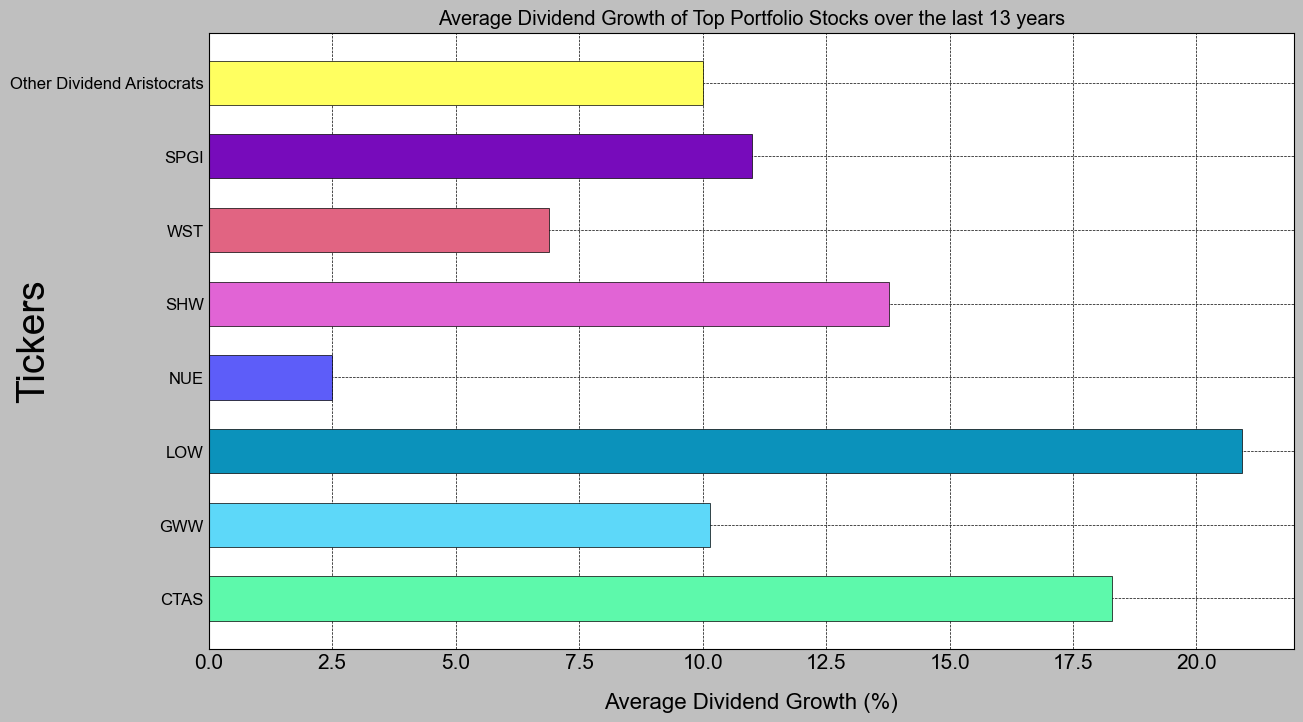

In [180]:
plt.style.use("grayscale")
plt.figure(figsize=(14, 8))
plt.barh(div_growth_top7_df["Tickers"], div_growth_top7_df["Mean Dividend Growth"], height = 0.6, 
        color = ['#5DF9AB', '#5DD8F9', '#0B92BB', '#5D5DF9', '#E164D5', '#E16482', '#770BBB', '#FFFF60'])

plt.xlabel('Average Dividend Growth (%)', labelpad = 14.0, fontsize = 16.0)
plt.ylabel('Tickers', fontsize= 28.0, labelpad = -30)
plt.title('Average Dividend Growth of Top Portfolio Stocks over the last 13 years', color = "black");
plt.xticks(fontsize = 15.0)
plt.yticks(fontsize = 12.0);


## Compare dividend growth in the last 5 years of top 7 performers vs entire dataset

In [181]:
#Load dividend data for all the Dividend Aristocrats

start_date = '2018-01-01'
end_date = '2023-07-08'

my_2018_list = [yf.Ticker(company).dividends.loc[start_date:end_date] for company in keys_list ]
my_2018_list

div_2018_dict = {}
i = 0

for comp in keys_list:
    div_2018_dict[comp] = my_2018_list[i]
    i = i+1
div_2018_dict

{'ABT': Date
 2018-01-11 00:00:00-05:00    0.28
 2018-04-12 00:00:00-04:00    0.28
 2018-07-12 00:00:00-04:00    0.28
 2018-10-12 00:00:00-04:00    0.28
 2019-01-14 00:00:00-05:00    0.32
 2019-04-12 00:00:00-04:00    0.32
 2019-07-12 00:00:00-04:00    0.32
 2019-10-11 00:00:00-04:00    0.32
 2020-01-14 00:00:00-05:00    0.36
 2020-04-14 00:00:00-04:00    0.36
 2020-07-14 00:00:00-04:00    0.36
 2020-10-14 00:00:00-04:00    0.36
 2021-01-14 00:00:00-05:00    0.45
 2021-04-14 00:00:00-04:00    0.45
 2021-07-14 00:00:00-04:00    0.45
 2021-10-14 00:00:00-04:00    0.45
 2022-01-13 00:00:00-05:00    0.47
 2022-04-13 00:00:00-04:00    0.47
 2022-07-14 00:00:00-04:00    0.47
 2022-10-13 00:00:00-04:00    0.47
 2023-01-12 00:00:00-05:00    0.51
 2023-04-13 00:00:00-04:00    0.51
 Name: Dividends, dtype: float64,
 'ADM': Date
 2018-02-16 00:00:00-05:00    0.335
 2018-05-16 00:00:00-04:00    0.335
 2018-08-15 00:00:00-04:00    0.335
 2018-11-21 00:00:00-05:00    0.335
 2019-02-15 00:00:00-05:00

## Drop outliers for BF-B and BEN

In [182]:
div_2018_dict["BF-B"]

Date
2018-03-02 00:00:00-05:00    0.158
2018-03-29 00:00:00-04:00    1.000
2018-06-05 00:00:00-04:00    0.158
2018-09-05 00:00:00-04:00    0.158
2018-12-06 00:00:00-05:00    0.166
2019-03-01 00:00:00-05:00    0.166
2019-06-05 00:00:00-04:00    0.166
2019-09-05 00:00:00-04:00    0.166
2019-12-04 00:00:00-05:00    0.174
2020-03-06 00:00:00-05:00    0.174
2020-06-05 00:00:00-04:00    0.174
2020-09-03 00:00:00-04:00    0.174
2020-12-03 00:00:00-05:00    0.180
2021-03-05 00:00:00-05:00    0.180
2021-06-07 00:00:00-04:00    0.180
2021-09-02 00:00:00-04:00    0.180
2021-12-02 00:00:00-05:00    0.189
2021-12-08 00:00:00-05:00    1.000
2022-03-07 00:00:00-05:00    0.189
2022-06-07 00:00:00-04:00    0.189
2022-09-02 00:00:00-04:00    0.189
2022-12-01 00:00:00-05:00    0.206
2023-03-07 00:00:00-05:00    0.206
2023-06-07 00:00:00-04:00    0.206
Name: Dividends, dtype: float64

In [183]:
div_2018_dict["BEN"].drop("2018-03-28 00:00:00-04:00", inplace = True)

In [184]:
div_2018_dict["BF-B"].drop(labels = "2018-03-29 00:00:00-04:00", inplace = True)
div_2018_dict["BF-B"].drop("2021-12-08 00:00:00-05:00", inplace = True)

### Now get average dividend growth for all the stocks in the dataset

In [185]:
div_growth_2018_means_list = [np.mean( (np.diff(div_2018_dict[stock].unique()) / div_2018_dict[stock].unique()[:-1]) * 100) for 
                         stock in keys_list]   

div_growth_2018_df = pd.DataFrame({"Tickers": keys_list, "Mean Dividend Growth": div_growth_2018_means_list})
div_growth_2018_df

,Tickers,Mean Dividend Growth
0,ABT,12.948159
1,ADM,6.144128
2,ADP,12.237417
3,AFL,10.323824
4,ALB,3.663377
...,...,...
59,TROW,27.739488
60,WBA,3.765895
61,WMT,1.853123
62,WST,6.299486


In [186]:
condition_top = div_growth_2018_df["Tickers"].isin(max_7list)
div_growth_2018_top7_df = div_growth_2018_df[condition_top]
div_growth_2018_top7_df

,Tickers,Mean Dividend Growth
20,CTAS,6.224824
31,GWW,6.429513
39,LOW,21.066149
46,NUE,6.393245
53,SHW,16.607569
55,SPGI,12.548239
62,WST,6.299486


In [187]:
all_other_2018_div_growths_df = div_growth_2018_df.query("Tickers not in @max_7list")
all_other_2018_div_growths_df

,Tickers,Mean Dividend Growth
0,ABT,12.948159
1,ADM,6.144128
2,ADP,12.237417
3,AFL,10.323824
4,ALB,3.663377
5,AOS,10.896326
6,APD,9.787355
7,ATO,8.818083
8,BDX,3.707397
9,BEN,5.522608


In [188]:
mean_2018_div_growth_all_stocks = all_other_2018_div_growths_df["Mean Dividend Growth"].mean()
mean_2018_div_growth_all_stocks

6.831079709998069

In [189]:
div_growth_2018_all_stocks_dict = {'Tickers': "Other Dividend Aristocrats", 'Mean Dividend Growth': mean_2018_div_growth_all_stocks}
div_growth_2018_top7_df = div_growth_2018_top7_df.append(div_growth_2018_all_stocks_dict, ignore_index = True) 

C:\Users\Irochka\AppData\Local\Temp\ipykernel_78416\580926451.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  div_growth_2018_top7_df = div_growth_2018_top7_df.append(div_growth_2018_all_stocks_dict, ignore_index = True)


In [190]:
div_growth_2018_top7_df

,Tickers,Mean Dividend Growth
0,CTAS,6.224824
1,GWW,6.429513
2,LOW,21.066149
3,NUE,6.393245
4,SHW,16.607569
5,SPGI,12.548239
6,WST,6.299486
7,Other Dividend Aristocrats,6.831080


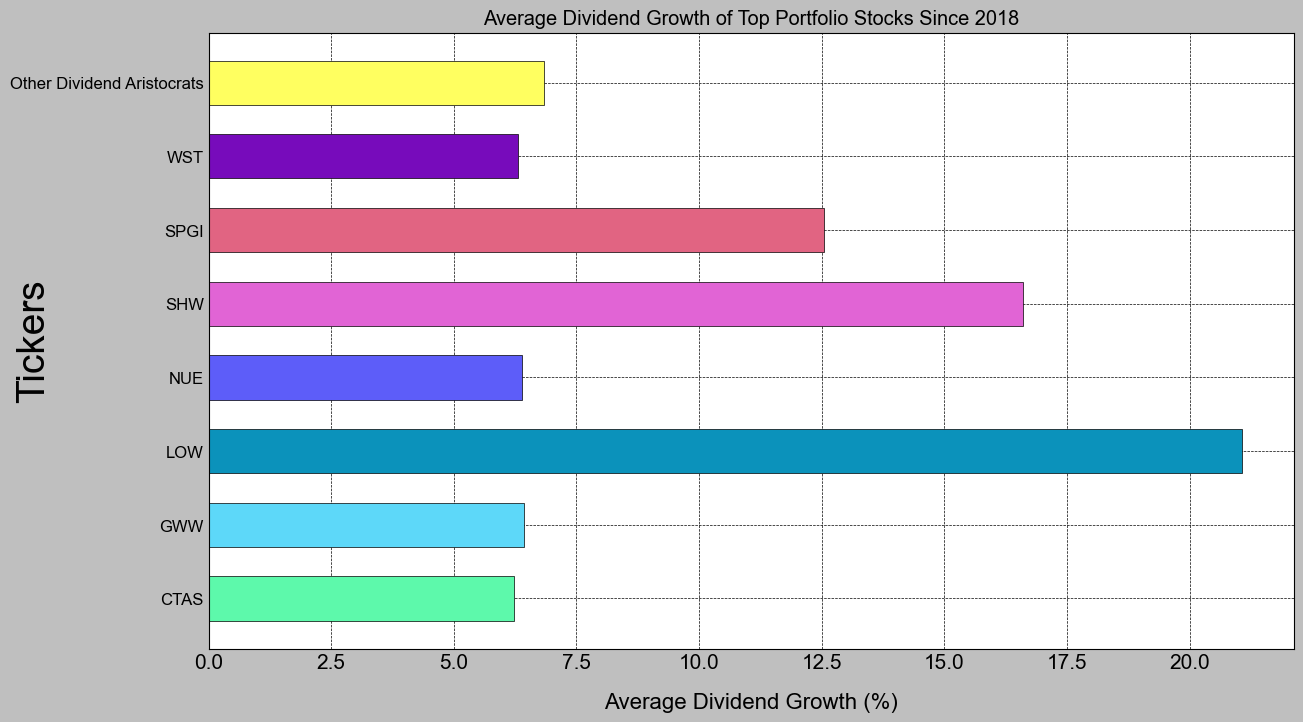

In [191]:
plt.style.use("grayscale")
plt.figure(figsize=(14, 8))
plt.barh(div_growth_2018_top7_df["Tickers"], div_growth_2018_top7_df["Mean Dividend Growth"], height = 0.6, 
        color = ['#5DF9AB', '#5DD8F9', '#0B92BB', '#5D5DF9', '#E164D5', '#E16482', '#770BBB', '#FFFF60'])

plt.xlabel('Average Dividend Growth (%)', labelpad = 14.0, fontsize = 16.0)
plt.ylabel('Tickers', fontsize= 28.0, labelpad = -30)
plt.title('Average Dividend Growth of Top Portfolio Stocks Since 2018', color = "black");
plt.xticks(fontsize = 15.0)
plt.yticks(fontsize = 12.0);

In [192]:
condition_high_growth = div_growth_2018_df["Mean Dividend Growth"] >= 12
num_high_growth = len(div_growth_2018_df[condition_high_growth].index)
print(f"There are {num_high_growth} stocks in the entire portfolio that had an average dividend growth rate of greater " 
      "than 12% in the last 5 years")
print(f"\nThat means that {(3 / num_high_growth) * 100}% of the top 7 stocks in the entire portfolio had "
     "an average dividend growth rate that was higher \nthan 12 percent")
      


There are 8 stocks in the entire portfolio that had an average dividend growth rate of greater than 12% in the last 5 years

That means that 37.5% of the top 7 stocks in the entire portfolio had an average dividend growth rate that was higher 
than 12 percent


## Now compare dividend growth of top 7 performers vs bottom 7 performers since 2018!

In [193]:
div_growth_2018_top7_df = div_growth_2018_top7_df.iloc[0:7]
div_growth_2018_top7_df

,Tickers,Mean Dividend Growth
0,CTAS,6.224824
1,GWW,6.429513
2,LOW,21.066149
3,NUE,6.393245
4,SHW,16.607569
5,SPGI,12.548239
6,WST,6.299486


In [194]:
lowest_7list

['WBA', 'SWK', 'MMM', 'BEN', 'FRT', 'IBM', 'CHRW']

In [195]:
div_growth_2018_df

,Tickers,Mean Dividend Growth
0,ABT,12.948159
1,ADM,6.144128
2,ADP,12.237417
3,AFL,10.323824
4,ALB,3.663377
...,...,...
59,TROW,27.739488
60,WBA,3.765895
61,WMT,1.853123
62,WST,6.299486


In [196]:
div_growth_2018_bottom7_df = div_growth_2018_df.query("Tickers in @lowest_7list")
div_growth_2018_bottom7_df

,Tickers,Mean Dividend Growth
9,BEN,5.522608
16,CHRW,7.361970
28,FRT,1.554307
33,IBM,2.128287
43,MMM,1.998555
56,SWK,4.975920
60,WBA,3.765895


In [197]:
div_growth_2018_top_bottom = pd.concat([div_growth_2018_top7_df, div_growth_2018_bottom7_df], ignore_index = True)
div_growth_2018_top_bottom

,Tickers,Mean Dividend Growth
0,CTAS,6.224824
1,GWW,6.429513
2,LOW,21.066149
3,NUE,6.393245
4,SHW,16.607569
5,SPGI,12.548239
6,WST,6.299486
7,BEN,5.522608
8,CHRW,7.361970
9,FRT,1.554307


In [198]:
bottom_vs_top_lst = ["Top Portfolio Performer" if i < 7 else "Bottom Portfolio Performer" for i in range(14)]
div_growth_2018_top_bottom["Top vs Bottom"] = bottom_vs_top_lst
div_growth_2018_top_bottom

,Tickers,Mean Dividend Growth,Top vs Bottom
0,CTAS,6.224824,Top Portfolio Performer
1,GWW,6.429513,Top Portfolio Performer
2,LOW,21.066149,Top Portfolio Performer
3,NUE,6.393245,Top Portfolio Performer
4,SHW,16.607569,Top Portfolio Performer
5,SPGI,12.548239,Top Portfolio Performer
6,WST,6.299486,Top Portfolio Performer
7,BEN,5.522608,Bottom Portfolio Performer
8,CHRW,7.361970,Bottom Portfolio Performer
9,FRT,1.554307,Bottom Portfolio Performer


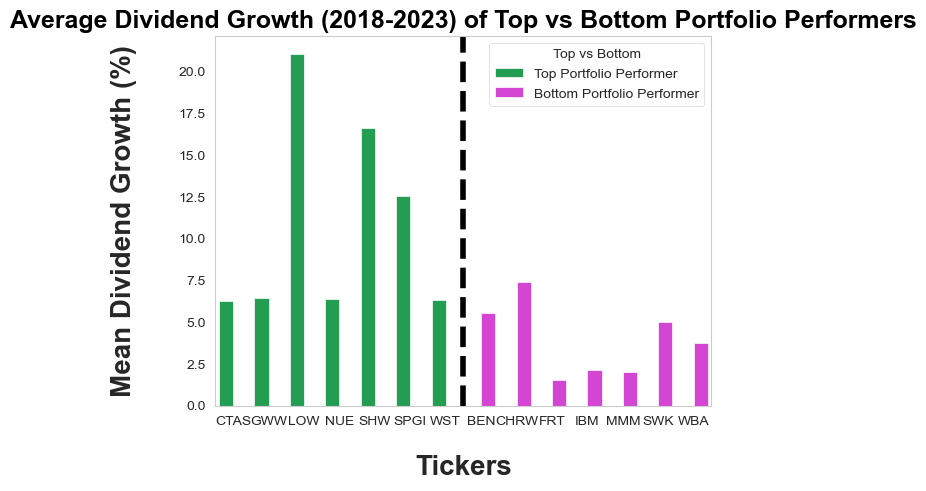

In [199]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.style.use("fast")
sns.barplot(x = "Tickers", y = "Mean Dividend Growth", data = div_growth_2018_top_bottom,
            hue = "Top vs Bottom", palette = ["#0EB14C" ,"#EC2DEA"])
plt.axvline(x = 6.5, color ='black', linewidth = 4, linestyle = "--") 
plt.ylabel('Mean Dividend Growth (%)', labelpad = 30.0, fontsize = 20.0, fontweight = "bold")
plt.xlabel('Tickers', fontsize= 20.0, labelpad = 20, fontweight = "bold")
plt.title('Average Dividend Growth (2018-2023) of Top vs Bottom Portfolio Performers', color = "black", fontsize = 18, fontweight = "bold");


## Now let's get Total Revenue and Gross Profits:

In [200]:
winners_7string = " ".join(max_7list)
winners_7string

'SHW GWW NUE LOW SPGI CTAS WST'

In [201]:
tickers = yf.Tickers(winners_7string)

In [202]:
lst_of_top_7_dfs_profits = []
for symbol in max_7list:
    df_symbol = tickers.tickers[symbol].financials.T
    df_profit_revenue = df_symbol[["Gross Profit", "Total Revenue"]].copy()
    df_list = [symbol for i in range(len(df_profit_revenue.index))]
    df_profit_revenue[symbol] = df_list
# df_profit_revenue
    sorted_idx = df_profit_revenue.index.sort_values()  #sorts the dates in ascending order (they were previously in 
    #descending order)
    df_profit_revenue = df_profit_revenue.loc[sorted_idx]  #puts the rest of the dataframe in sorted order by the ascending dates
# df_profit_revenue
    lst_of_top_7_dfs_profits.append(df_profit_revenue)


lst_of_top_7_dfs_profits[3]

,Gross Profit,Total Revenue,LOW
2020-01-31,22943000000.0,72148000000.0,LOW
2021-01-31,29572000000.0,89597000000.0,LOW
2022-01-31,32056000000.0,96250000000.0,LOW
2023-01-31,32257000000.0,97059000000.0,LOW


In [203]:
#df.pct_change gets percent increase of any column or columns of a dataframe and returns the result as a series

lst_of_top_7_dfs_profits[1][["Gross Profit", "Total Revenue"]].pct_change().mean()

Gross Profit     0.105589
Total Revenue    0.100107
dtype: float64

In [204]:
gross_profit_means_list = [lst_of_top_7_dfs_profits[i][["Gross Profit", "Total Revenue"]].pct_change().mean()[0] * 100 
                         for i in range(len(lst_of_top_7_dfs_profits))]   
total_revenue_means_list = [lst_of_top_7_dfs_profits[i][["Gross Profit", "Total Revenue"]].pct_change().mean()[1] * 100 
                         for i in range(len(lst_of_top_7_dfs_profits))] 
profit_revenue_means_df = pd.DataFrame({"Tickers": max_7list, "Average Percent Increase in Gross Profit": gross_profit_means_list, 
                                        "Average Percent Increase in Total Revenue": total_revenue_means_list})
profit_revenue_means_df

,Tickers,Average Percent Increase in Gross Profit,Average Percent Increase in Total Revenue
0,SHW,5.197459,7.415840
1,GWW,10.558893,10.010734
2,NUE,130.477713,28.031683
3,LOW,12.640070,10.817000
4,SPGI,14.933955,19.113202
5,CTAS,8.993703,7.683950
6,WST,25.511114,16.843715


In [205]:
losers_7string = " ".join(lowest_7list)
losers_7string

'WBA SWK MMM BEN FRT IBM CHRW'

In [206]:
lst_of_bottom_7_dfs_profits = []
for symbol in lowest_7list:
    df_symbol = yf.Tickers(losers_7string).tickers[symbol].financials.T
    df_profit_revenue = df_symbol[["Gross Profit", "Total Revenue"]].copy()
    df_list = [symbol for i in range(len(df_profit_revenue.index))]
    df_profit_revenue[symbol] = df_list
# df_profit_revenue
    sorted_idx = df_profit_revenue.index.sort_values()  #sorts the dates in ascending order (they were previously in 
    #descending order)
    df_profit_revenue = df_profit_revenue.loc[sorted_idx]  #puts the rest of the dataframe in sorted order by the ascending dates
# df_profit_revenue
    lst_of_bottom_7_dfs_profits.append(df_profit_revenue)


lst_of_bottom_7_dfs_profits[3]

,Gross Profit,Total Revenue,BEN
2019-09-30,2370200000.0,5774500000.0,BEN
2020-09-30,1989500000.0,5566500000.0,BEN
2021-09-30,3348400000.0,8425500000.0,BEN
2022-09-30,3339900000.0,8275300000.0,BEN


In [207]:
gross_bottom_profit_means_list = [lst_of_bottom_7_dfs_profits[i][["Gross Profit", "Total Revenue"]].pct_change().mean()[0] * 100 
                         for i in range(len(lst_of_bottom_7_dfs_profits))]   
total_bottom_revenue_means_list = [lst_of_bottom_7_dfs_profits[i][["Gross Profit", "Total Revenue"]].pct_change().mean()[1] * 100 
                         for i in range(len(lst_of_bottom_7_dfs_profits))] 
profit_bottom_revenue_means_df = pd.DataFrame({"Tickers": lowest_7list, "Average Percent Increase in Gross Profit": gross_bottom_profit_means_list, 
                                        "Average Percent Increase in Total Revenue": total_bottom_revenue_means_list})
profit_bottom_revenue_means_df

,Tickers,Average Percent Increase in Gross Profit,Average Percent Increase in Total Revenue
0,WBA,-1.987357,-0.979569
1,SWK,-3.195587,5.535252
2,MMM,0.239511,2.272416
3,BEN,17.329269,15.325364
4,FRT,5.017792,5.360328
5,IBM,-3.393942,-7.042449
6,CHRW,14.875406,18.436059


In [208]:
all_the_revenues_df = pd.concat([profit_revenue_means_df, profit_bottom_revenue_means_df], ignore_index = True)
all_the_revenues_df

,Tickers,Average Percent Increase in Gross Profit,Average Percent Increase in Total Revenue
0,SHW,5.197459,7.415840
1,GWW,10.558893,10.010734
2,NUE,130.477713,28.031683
3,LOW,12.640070,10.817000
4,SPGI,14.933955,19.113202
5,CTAS,8.993703,7.683950
6,WST,25.511114,16.843715
7,WBA,-1.987357,-0.979569
8,SWK,-3.195587,5.535252
9,MMM,0.239511,2.272416


In [209]:
bottom_vs_top_lst = ["Top Portfolio Performer" if i < 7 else "Bottom Portfolio Performer" for i in range(14)]
all_the_revenues_df["Top vs Bottom"] = bottom_vs_top_lst
all_the_revenues_df

,Tickers,Average Percent Increase in Gross Profit,Average Percent Increase in Total Revenue,Top vs Bottom
0,SHW,5.197459,7.415840,Top Portfolio Performer
1,GWW,10.558893,10.010734,Top Portfolio Performer
2,NUE,130.477713,28.031683,Top Portfolio Performer
3,LOW,12.640070,10.817000,Top Portfolio Performer
4,SPGI,14.933955,19.113202,Top Portfolio Performer
5,CTAS,8.993703,7.683950,Top Portfolio Performer
6,WST,25.511114,16.843715,Top Portfolio Performer
7,WBA,-1.987357,-0.979569,Bottom Portfolio Performer
8,SWK,-3.195587,5.535252,Bottom Portfolio Performer
9,MMM,0.239511,2.272416,Bottom Portfolio Performer


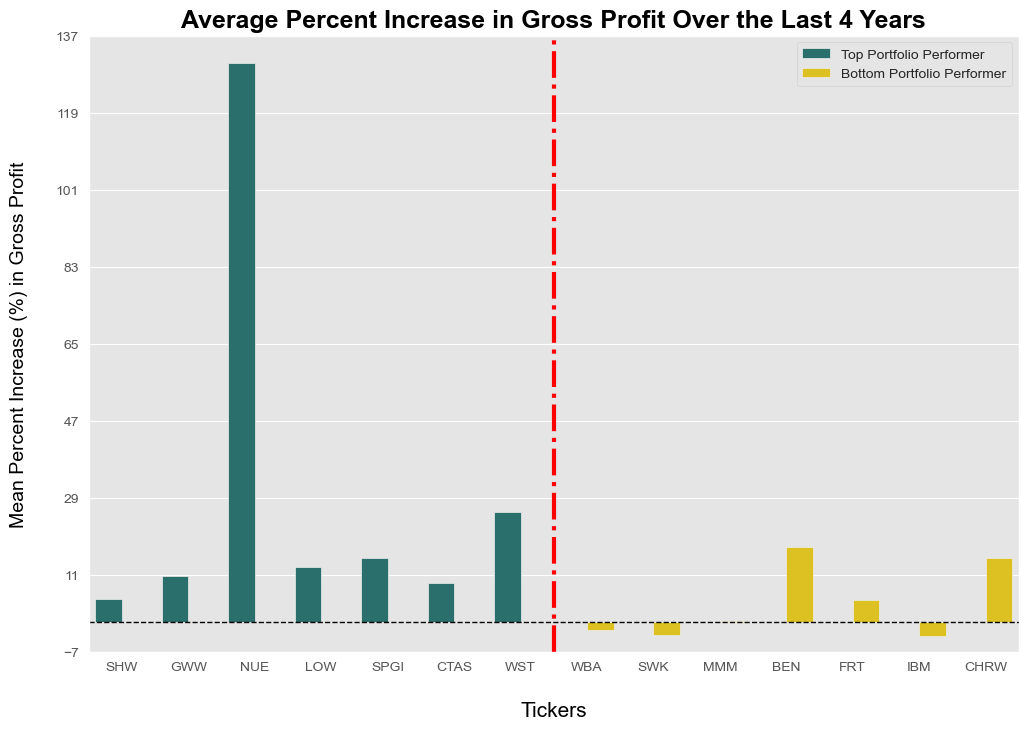

In [229]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.style.use("ggplot")
plt.figure(figsize=(12, 8))
sns.barplot(x = "Tickers", y = "Average Percent Increase in Gross Profit", data = all_the_revenues_df,
            hue = "Top vs Bottom", palette = ["#207A76" ,"#FCD604"] )           
plt.axhline(y = 0, color ='black', linewidth = 1, linestyle = 'dashed')
# plt.axvline(x = -1, color ='black', linewidth = 1, linestyle = 'dashed')
plt.axvline(x = 6.5, color ='red', linewidth = 3, linestyle = 'dashdot')
plt.xlabel('Tickers', fontsize= 15.0, labelpad = 20, color = "black")
plt.ylabel('Mean Percent Increase (%) in Gross Profit', fontsize= 14.0, labelpad = 20, color = "black")
plt.title('Average Percent Increase in Gross Profit Over the Last 4 Years', color = "black", fontsize = 18, fontweight = "bold");
plt.ylim(ymax = 40, ymin = -4)
plt.yticks(np.arange(-7, 146, 18))
plt.legend(loc = "upper right")
plt.show();

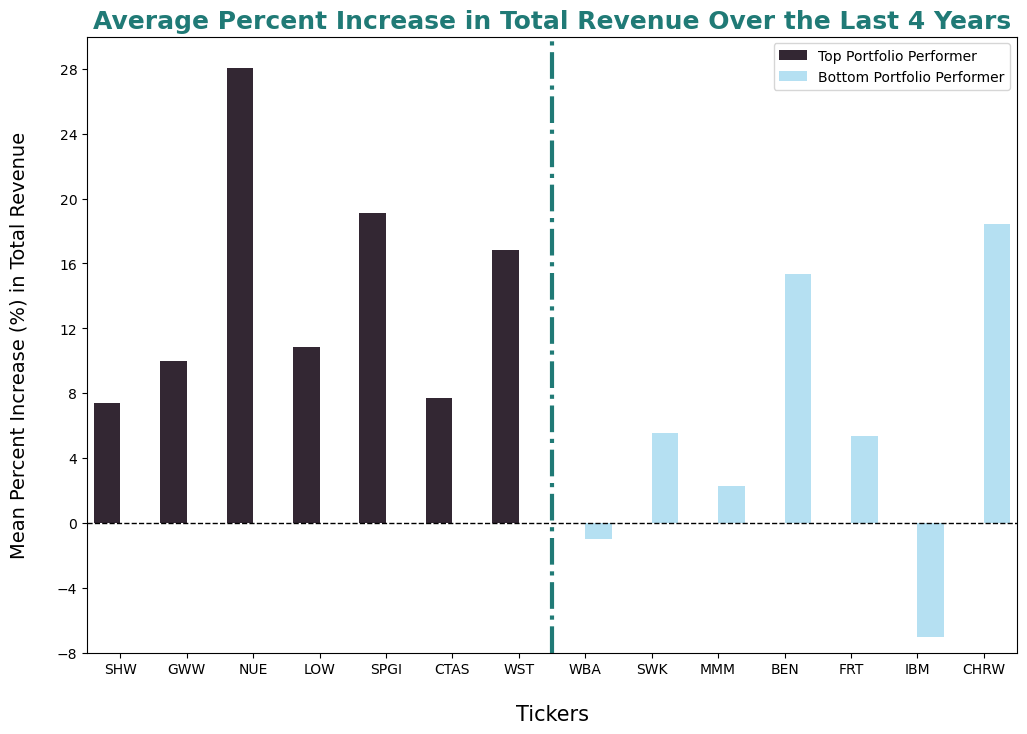

In [211]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.style.use("default")
plt.figure(figsize=(12, 8))
sns.barplot(x = "Tickers", y = "Average Percent Increase in Total Revenue", data = all_the_revenues_df,
            hue = "Top vs Bottom", palette = ["#352535" ,"#ABE4FC"] )           
plt.axhline(y = 0, color ='black', linewidth = 1, linestyle = 'dashed')
# plt.axvline(x = 0, color ='black', linewidth = 1, linestyle = 'dashed')
plt.axvline(x = 6.5, color ='#207A76', linewidth = 3, linestyle = 'dashdot')
plt.xlabel('Tickers', fontsize= 15.0, labelpad = 20, color = "black")
plt.ylabel('Mean Percent Increase (%) in Total Revenue', fontsize= 14.0, labelpad = 20, color = "black")
plt.title('Average Percent Increase in Total Revenue Over the Last 4 Years', color = "#207A76", fontsize = 18, fontweight = "bold");
plt.ylim(ymax = 30, ymin = -4)
plt.yticks(np.arange(-8, 30, 4))
plt.legend(loc = "upper right")
plt.show();

In [212]:
highest_10 = {}
for count, values_list in enumerate(all_total_values):
    key = no_date_df.columns[count]
    highest_10[key] = round(values_list[-1], 2)

    
sorted_10 = sorted(highest_10.items(), key=lambda item: item[1])
max_10 = sorted_10[-10:]
max_10

[('ADP', 612876.54),
 ('ITW', 621879.65),
 ('NEE', 664273.76),
 ('SHW', 667189.32),
 ('GWW', 672610.19),
 ('NUE', 763229.27),
 ('LOW', 855957.95),
 ('SPGI', 866742.23),
 ('CTAS', 1244057.38),
 ('WST', 1245830.58)]

In [213]:
max_10_list = []
[max_10_list.append(key[0]) for key in max_10]
max_10_list

['ADP', 'ITW', 'NEE', 'SHW', 'GWW', 'NUE', 'LOW', 'SPGI', 'CTAS', 'WST']

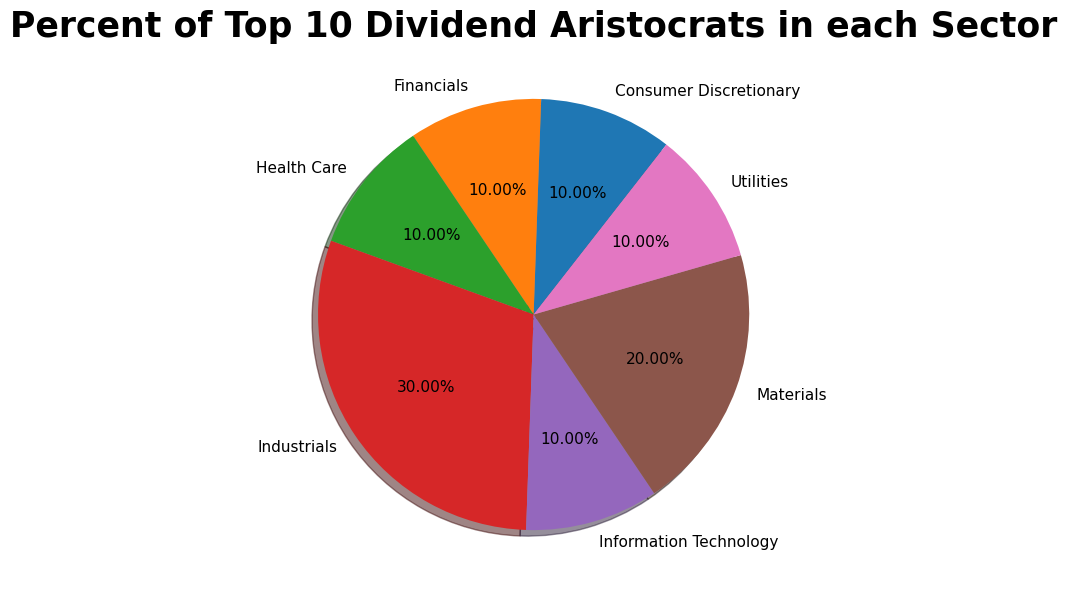

In [214]:
condition_top_ten = div_aristocrats_df["Ticker symbol"].isin(max_10_list)
top_ten_df = div_aristocrats_df[condition_top_ten]


sectors = top_ten_df.groupby("Sector")["Sector"].count()
data = sectors.values
labels = sectors.index
  
#e = [0.03, 0]  # e works like this: If e is not *None*, it is a len(x) array which specifies the fraction 
                        #of the radius with which to offset, or separate from each wedge.

plt.figure(figsize=(8,7))  
plt.pie(data, labels=labels, autopct = '%.2f%%', shadow = True, startangle = 52,  textprops={'fontsize': 11, 'color': 'black'})
plt.title("Percent of Top 10 Dividend Aristocrats in each Sector", fontsize = 25, color = 'black', fontweight = "bold");

In [215]:
top_ten_df.reset_index(drop=True, inplace=True)

In [216]:
top_ten_df

,Company,Ticker symbol,Sector
0,Automatic Data Processing,ADP,Information Technology
1,Cintas Corp,CTAS,Industrials
2,Illinois Tool Works,ITW,Industrials
3,Lowe's,LOW,Consumer Discretionary
4,NextEra Energy,NEE,Utilities
5,Nucor Corp,NUE,Materials
6,S&P Global Inc,SPGI,Financials
7,Sherwin-Williams,SHW,Materials
8,W. W. Grainger,GWW,Industrials
9,West Pharmaceutical Services Inc,WST,Health Care


In [217]:
max_10_list.sort()

In [218]:
max_10_list

['ADP', 'CTAS', 'GWW', 'ITW', 'LOW', 'NEE', 'NUE', 'SHW', 'SPGI', 'WST']

In [219]:
max_10.sort()

In [220]:
max_10

[('ADP', 612876.54),
 ('CTAS', 1244057.38),
 ('GWW', 672610.19),
 ('ITW', 621879.65),
 ('LOW', 855957.95),
 ('NEE', 664273.76),
 ('NUE', 763229.27),
 ('SHW', 667189.32),
 ('SPGI', 866742.23),
 ('WST', 1245830.58)]

In [221]:
top_ten_df = top_ten_df.sort_values(by = ["Ticker symbol"])

In [222]:
top_ten_df

,Company,Ticker symbol,Sector
0,Automatic Data Processing,ADP,Information Technology
1,Cintas Corp,CTAS,Industrials
8,W. W. Grainger,GWW,Industrials
2,Illinois Tool Works,ITW,Industrials
3,Lowe's,LOW,Consumer Discretionary
4,NextEra Energy,NEE,Utilities
5,Nucor Corp,NUE,Materials
7,Sherwin-Williams,SHW,Materials
6,S&P Global Inc,SPGI,Financials
9,West Pharmaceutical Services Inc,WST,Health Care


In [223]:
highest_ten_values_list = []
[highest_ten_values_list.append(key[1]) for key in max_10]
highest_ten_values_list

[612876.54,
 1244057.38,
 672610.19,
 621879.65,
 855957.95,
 664273.76,
 763229.27,
 667189.32,
 866742.23,
 1245830.58]

In [224]:
top_ten_df["Portfolio Value"] = highest_ten_values_list

In [225]:
top_ten_df = top_ten_df.sort_values(by = ["Portfolio Value"], ascending = False)
top_ten_df

,Company,Ticker symbol,Sector,Portfolio Value
9,West Pharmaceutical Services Inc,WST,Health Care,1245830.58
1,Cintas Corp,CTAS,Industrials,1244057.38
6,S&P Global Inc,SPGI,Financials,866742.23
3,Lowe's,LOW,Consumer Discretionary,855957.95
5,Nucor Corp,NUE,Materials,763229.27
8,W. W. Grainger,GWW,Industrials,672610.19
7,Sherwin-Williams,SHW,Materials,667189.32
4,NextEra Energy,NEE,Utilities,664273.76
2,Illinois Tool Works,ITW,Industrials,621879.65
0,Automatic Data Processing,ADP,Information Technology,612876.54
